# Part 1: Preliminaries

We will start by pulling CAMB python so that we can get it running. Get pycamb from https://pypi.python.org/pypi/camb/0.1.1.

In [27]:
!python -c "import pandas" || python -m pip install pandas
!python -c "import camb" || python -m pip install camb
!python -c "import getdist" || python -m pip install getdist
!python -c "import pyactlike" || python -m pip install pyactlike@git+https://github.com/ACTCollaboration/pyactlike

/bin/bash: line 1: python: command not found
--2025-02-27 14:31:12--  https://github.com/jeffmcm1977/CMBAnalysis_SummerSchool/raw/master/cmb_school.tar.gz
20.207.73.82thub.com (github.com)... 
connected. to github.com (github.com)|20.207.73.82|:443... 
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jeffmcm1977/CMBAnalysis_SummerSchool/master/cmb_school.tar.gz [following]
--2025-02-27 14:31:13--  https://raw.githubusercontent.com/jeffmcm1977/CMBAnalysis_SummerSchool/master/cmb_school.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 45181251 (43M) [application/octet-stream]
Saving to: ‘cmb_school.tar.gz.1’

cmb_school.tar.gz.1 100%[===================>]  43.09M  3.17MB/s    in 14s     

2025-02-27 14:31:33 (3.17 MB/s)

Only run the below code if you get error in pyactlike. If the error persists then run these commands in terminal excluding the "!" symbol.

In [15]:
!git clone https://github.com/ACTCollaboration/pyactlike
!cd pyactlike
!pip install . --user

fatal: destination path 'pyactlike' already exists and is not an empty directory.
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


## Cosmic Microwave Background Radiation
The Cosmic Microwave Background (CMB) is the relic radiation from the early universe, originating about 380,000 years after the Big Bang when the universe cooled enough for protons and electrons to combine into neutral hydrogen, making it transparent to photons. This decoupling of matter and radiation left a nearly uniform background of photons that has been cooling ever since due to the expansion of the universe. The CMB was first predicted theoretically in the 1940s by George Gamow, Ralph Alpher, and Robert Herman, and later discovered observationally by Arno Penzias and Robert Wilson in 1965, which earned them the Nobel Prize in Physics. Its spectrum is remarkably well-described as blackbody radiation, reflecting thermal equilibrium in the early universe.

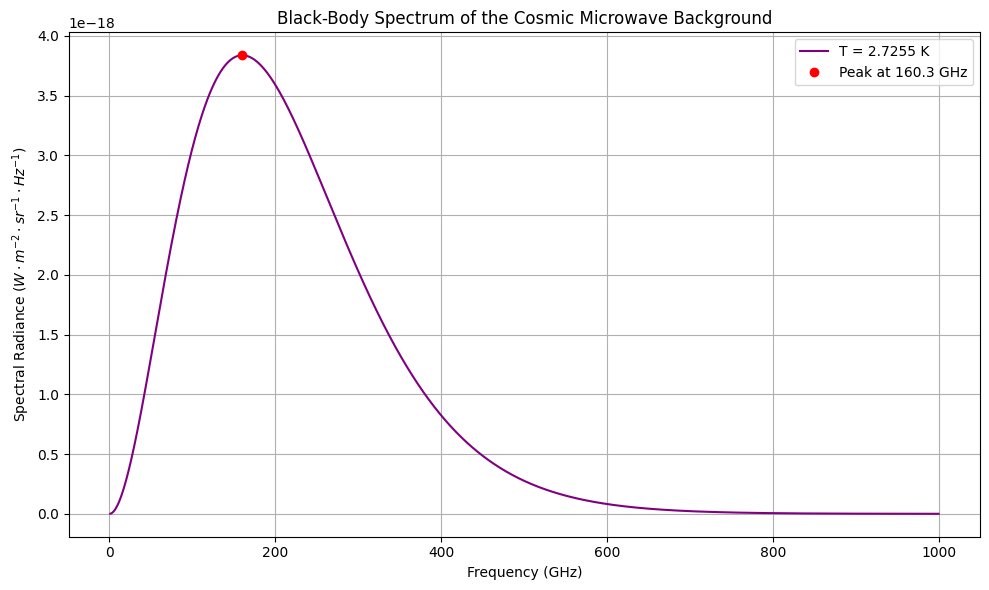

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
h = 6.62607015e-34  # Planck's constant (J·s)
c = 2.99792458e8    # Speed of light (m/s)
k_B = 1.380649e-23  # Boltzmann constant (J/K)
T_CMB = 2.7255      # CMB temperature (K)

# Generate a range of frequencies (Hz)
frequencies = np.linspace(1e9, 1000e9, 10000)

# Calculate the black-body spectral radiance
numerator = 2 * h * frequencies**3
denominator = c**2 * (np.exp((h * frequencies) / (k_B * T_CMB)) - 1)
spectral_radiance = numerator / denominator

# Find the frequency at the peak of the spectrum
peak_index = np.argmax(spectral_radiance)
peak_frequency_hz = frequencies[peak_index]
peak_frequency_ghz = peak_frequency_hz / 1e9
peak_radiance = spectral_radiance[peak_index]

# Convert frequencies to GHz for better plotting
frequencies_ghz = frequencies / 1e9

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(frequencies_ghz, spectral_radiance, color='purple', label=f'T = {T_CMB} K')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Spectral Radiance ($W \\cdot m^{-2} \\cdot sr^{-1} \\cdot Hz^{-1}$)')
plt.title('Black-Body Spectrum of the Cosmic Microwave Background')
plt.grid(True)

# Mark the peak with a red dot and a vertical dashed line
plt.plot(peak_frequency_ghz, peak_radiance, 'ro', label=f'Peak at {peak_frequency_ghz:.1f} GHz')

plt.legend()
plt.tight_layout()

plt.show()

The CMB has a blackbody spectrum peaking at around 160 GHz, corresponding to a temperature of approximately 2.725 K. Observational datasets, such as from the Atacama Cosmology Telescope (ACT), measure this peak slightly lower at around 150 GHz due to instrumental bandpasses, foregrounds, and the method of plotting intensity versus frequency. This precision measurement confirms both the thermal origin of the CMB and the exquisite agreement between theoretical predictions and observations.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pyactlike
import camb
from camb import model, initialpower

# Replace these paths with the paths to your data
path_to_cmb_notebook_data = '.'
path_to_act_notebook_data = './ACT data/'

We will begin by setting the initial values of the CAMB parameters, such as the cosmological parameters (e.g., the Hubble constant, matter and baryon densities), the primordial perturbation parameters (e.g., scalar amplitude, spectral index, and tensor-to-scalar ratio), and any other relevant options for the computation. Once these parameters are defined, we will run CAMB to compute the corresponding angular power spectra for the CMB, including the $TT$, $EE$, $TE$, and $BB$ modes (after tensors are included). Finally, we will visualize these power spectra by plotting them, which allows us to see how different physical effects and parameters shape the CMB anisotropies. We will start by pulling initialising the CAMB params structure that we will use later. This is similar to how you would change the params.ini file. Let us first check the default values of the parameter, which we will change.

In [2]:
# Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

# Print default values with full descriptions
print(f"Default Hubble parameter (H0)                    : {pars.H0} km/s/Mpc")
print(f"Default Physical Baryon density (ombh2)          : {pars.ombh2}  # Ω_b h^2, where Ω_b is the baryon fraction today")
print(f"Default Physical Cold Dark Matter density (omch2): {pars.omch2}  # Ω_c h^2, where Ω_c is the cold dark matter fraction today")
print(f"Default Curvature parameter (omk)                : {pars.omk}  # Ω_k, curvature of the universe")

Default Hubble parameter (H0)                    : 67.0 km/s/Mpc
Default Physical Baryon density (ombh2)          : 0.0  # Ω_b h^2, where Ω_b is the baryon fraction today
Default Physical Cold Dark Matter density (omch2): 0.0  # Ω_c h^2, where Ω_c is the cold dark matter fraction today
Default Curvature parameter (omk)                : 0.0  # Ω_k, curvature of the universe


In [3]:
# The base cosmology model is set with these params, the others are all set to their default values
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
# Print the new values with explanations
print(f"New Hubble parameter (H0)                    : {pars.H0} km/s/Mpc")
print(f"New Physical Baryon density (ombh2)          : {pars.ombh2}  # Ω_b h^2")
print(f"New Physical Cold Dark Matter density (omch2): {pars.omch2}  # Ω_c h^2")
print(f"New Curvature parameter (omk)                : {pars.omk}    # Ω_k (0 = flat universe)")
print(f"Sum of neutrino masses (mnu)                 : {pars.omeganu*pars.H0**2:.2f} eV")  # Convert Ω_nu h^2 to eV

New Hubble parameter (H0)                    : 67.5 km/s/Mpc
New Physical Baryon density (ombh2)          : 0.022  # Ω_b h^2
New Physical Cold Dark Matter density (omch2): 0.122  # Ω_c h^2
New Curvature parameter (omk)                : 0.0    # Ω_k (0 = flat universe)
Sum of neutrino masses (mnu)                 : 6.45 eV


## Evolution of Baryons, Photons, and Cold Dark Matter

During the early universe, before CMB was emitted, **baryons and photons were tightly coupled** through frequent interactions (primarily Thomson scattering). This coupling caused them to behave like a **single oscillating fluid**:

* The oscillations in the **baryon-photon density contrast** correspond to **acoustic waves** in this fluid.
* The amplitude and phase of these oscillations are affected by **pressure (from photons)** and **gravity (from both baryons and dark matter)**, as well as **viscosity effects** due to diffusion and imperfect coupling.

Meanwhile, **cold dark matter (CDM) was non-interacting**, so it did not participate in these oscillations. Instead, CDM **gravitationally clustered**, forming the **potential wells** into which baryons would eventually fall.

When **photons decoupled** at recombination:

1. Baryons were released from the photon pressure and began to **fall into the CDM potential wells**, forming the seeds of large-scale structure (galaxies, clusters, etc.).
2. Photons stopped interacting significantly with matter and began to **free-stream through the universe**. These photons are what we observe today as the **Cosmic Microwave Background (CMB)**.

Thus, the **CMB encodes a snapshot of the baryon-photon fluid at decoupling**, and the gravitational influence of CDM is imprinted in the pattern of temperature anisotropies we measure today. Note that `get_time_evolution` does not work with `pars.WantTensor=True`.

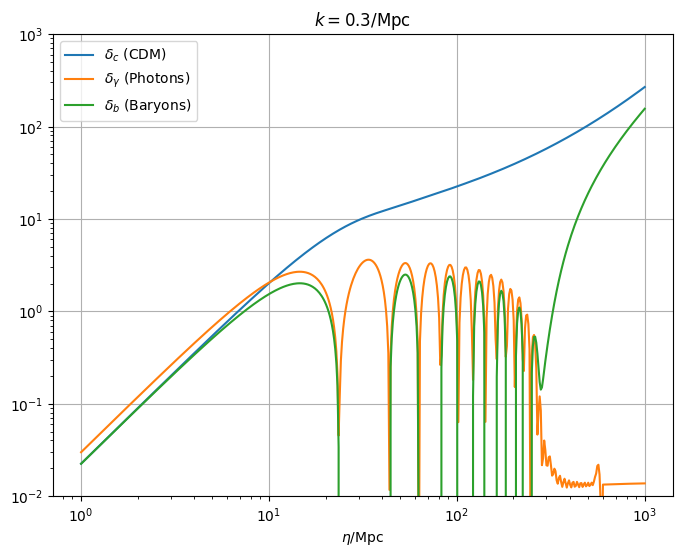

In [36]:
# Define the range for conformal time (eta)
eta = 10**(np.linspace(0, 3, 500))

# Define the plotting function
def plot_ev(ev, k):
    plt.figure(figsize=(8, 6))
    plt.loglog(eta, ev[:, 0], label=r'$\delta_{c}$ (CDM)') # Delta_cdm
    plt.loglog(eta, np.abs(ev[:, 1]), label=r'$\delta_{\gamma}$ (Photons)') # Absolute value of Delta_photon
    plt.loglog(eta, ev[:, 2], label=r'$\delta_{b}$ (Baryons)') # Delta_baryon
    plt.title(r'$k= %s/\rm{Mpc}$' % k)
    plt.ylim([0.01,10**3])
    plt.xlabel(r'$\eta/\rm{Mpc}$')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Run CAMB to get the time evolution data at the length scale of k=0.3/Mpc
# The list of species is changed to include 'delta_cdm', 'delta_photon', and 'delta_baryon'
k = 0.3
pars.WantTensors = False 
results =camb.get_results(pars)
data = results.get_time_evolution(k, eta, ['delta_cdm', 'delta_photon', 'delta_baryon'])

# Call the function to plot the data
plot_ev(data, k)

# Imprint of the BAO in CMB spectra
The oscillations of the baryon-photon fluid and the gravitational potential wells created by CDM leave distinct signatures in the CMB power spectra. The peaks and troughs in the temperature and polarization spectra correspond to different harmonics of the acoustic oscillations we just discussed. By computing the CMB power spectra for our cosmological parameters, we can see how the early-universe dynamics translate into the angular distribution of temperature fluctuations we observe today.

In [5]:
# The initial power spectrum is set here, separately from the rest of cosmology. The spectral index and tensor to scalar ratio is being specified.
pars.InitPower.set_params(ns=0.965, r=0)

# Set how far in multipole we want the power spectra, and turn on defaults for the params.
pars.set_for_lmax(4400, lens_potential_accuracy=0);

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars)

for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


## Plotting the total lensed and unlensed CMB power spectra
Now we want to plot the CMB power spectra for the parameter values that we defined earlier.

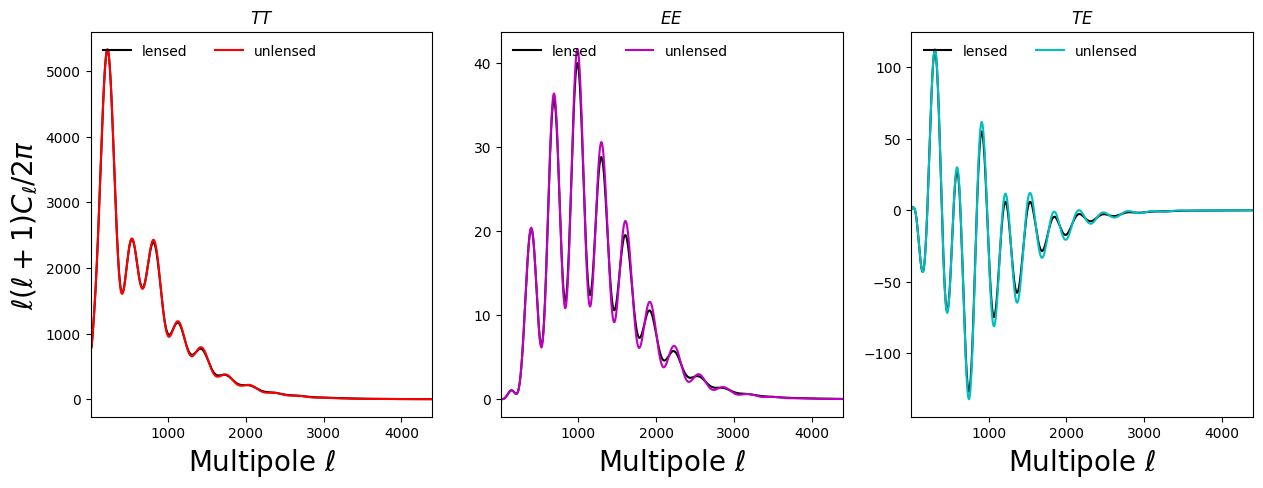

In [18]:
#Now we want to plot the total lensed and unlensed CMB power spectra 
totCL=powers['total']
CMBOutscale = 7.43e12
unlensedCL=powers['unlensed_scalar']
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0]) #create an array that starts from 0 to 4451-1
fig, ax = plt.subplots(1,3, figsize = (15,5))


ax[0].plot(ls,CMBOutscale*totCL[:,0], color='k', label='lensed')
ax[0].plot(ls,CMBOutscale*unlensedCL[:,0], color='r', label='unlensed')
ax[0].legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, frameon=False)
ax[0].set_xlabel(r'Multipole $\ell$', fontsize=20)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$', fontsize=20)
ax[0].set_title(r'$TT$')

ax[1].plot(ls,CMBOutscale*totCL[:,1], color='k', label='lensed')
ax[1].plot(ls,CMBOutscale*unlensedCL[:,1], color='m', label='unlensed')
ax[1].legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2,frameon=False)
ax[1].set_title(r'$EE$')
ax[1].set_xlabel(r'Multipole $\ell$', fontsize=20)


ax[2].plot(ls,CMBOutscale*totCL[:,3], color='k', label='lensed')
ax[2].plot(ls,CMBOutscale*unlensedCL[:,3], color='c', label='unlensed')
ax[2].legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, frameon=False)
ax[2].set_title(r'$TE$');
ax[2].set_xlabel(r'Multipole $\ell$', fontsize=20)

for ax in ax.reshape(-1): ax.set_xlim([2,4400])

### Computing CMB Power Spectra over a Range of Parameters

Now that we have successfully run CAMB once and understand the basic workflow, we can extend our analysis to compute the CMB angular power spectra ($C_\ell$) for different choices of cosmological and primordial parameters.

It is important to note the following:

* **Scalar perturbations** in the early universe (density fluctuations) generate temperature and polarization anisotropies in the CMB, which show up in the **$TT$, $EE$, and $TE$ power spectra**.
* **Tensor perturbations** (primordial gravitational waves) contribute an additional **$BB$ power spectrum**. The amplitude of this $BB$ mode depends on the **tensor-to-scalar ratio $r$**; if $r = 0$, no tensor modes exist and $BB$ is absent (except for secondary effects like lensing).

In this section, we will focus on computing these spectra and visualizing how they change as we vary key parameters like $H_0$, $\Omega_b h^2$, $\Omega_c h^2$, $n_s$, and $r$. This allows us to see the physical imprint of scalars and tensors on the CMB anisotropies and helps us understand how cosmological observations constrain these parameters.

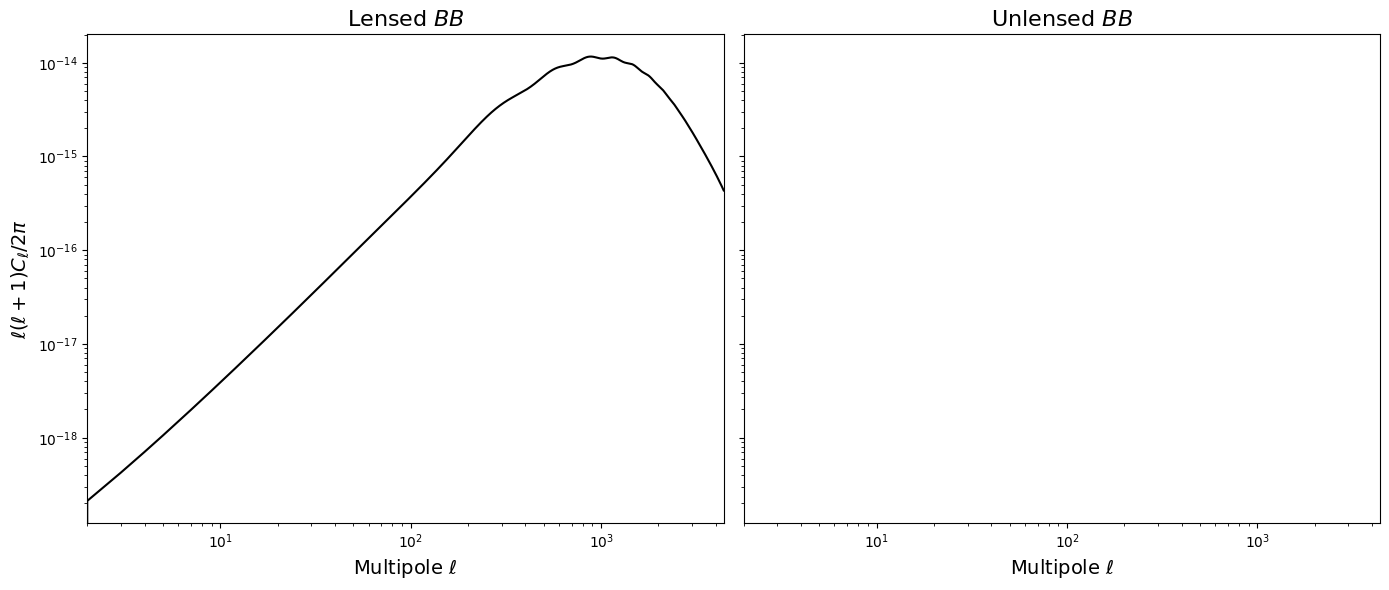

In [17]:
#In the last we skipped BB power spectrum (B-mode polarization).
pars.WantTensors = True

lmax=4400
# Let us first define the powerlaw power spectrum
inflation_params = initialpower.InitialPowerLaw()
inflation_params.set_params(ns=0.96, r=0) #set the spectral index and tensor to scalar ratio in the powerlaw power spectrum

#calculate the transfer function for the specified set of parameters
results = camb.get_transfer_functions(pars) 
results.power_spectra_from_transfer(inflation_params) # Generate power spectra from transfer functions

#Calculate Cls
BB = results.get_total_cls(lmax)        # lensed
unlensedBB = results.get_unlensed_total_cls(lmax)  # unlensed

# Subplots for lensed vs unlensed BB
fig, ax = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Lensed BB
ax[0].loglog(np.arange(lmax+1), BB[:,2], color='k')
ax[0].set_title(r'Lensed $BB$', fontsize=16)
ax[0].set_xlabel(r'Multipole $\ell$', fontsize=14)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$', fontsize=14)
ax[0].set_xlim([2, lmax])

# Unlensed BB
ax[1].loglog(np.arange(lmax+1), unlensedBB[:,2], color='r')
ax[1].set_title(r'Unlensed $BB$', fontsize=16)
ax[1].set_xlabel(r'Multipole $\ell$', fontsize=14)
ax[1].set_xlim([2, lmax])

plt.tight_layout()
plt.show()

Even when $r = 0$ (no primordial tensor modes), the $BB$ power spectrum is **not exactly zero**. This is because the **lensing of $E$-modes by the large-scale structure** of the universe converts some of the $E$-mode polarization into $B$-modes. Essentially, gravitational lensing distorts the pattern of polarization on the sky, creating a small $BB$ signal even in the absence of primordial gravitational waves.

When $r > 0$, **primordial tensor perturbations** generate an additional $BB$ signal, mainly at large angular scales (low $\ell$). By varying $r$, we can see how the amplitude of this primordial $BB$ spectrum changes, and how it adds to the lensing-induced $BB$ signal.

Detecting primordial $BB$ modes would be a **direct signature of gravitational waves from inflation**, providing evidence for the rapid expansion of the early universe. This makes the search for $BB$ polarization one of the most important goals in modern cosmology—a sort of **“holy grail”** for observational cosmologists.

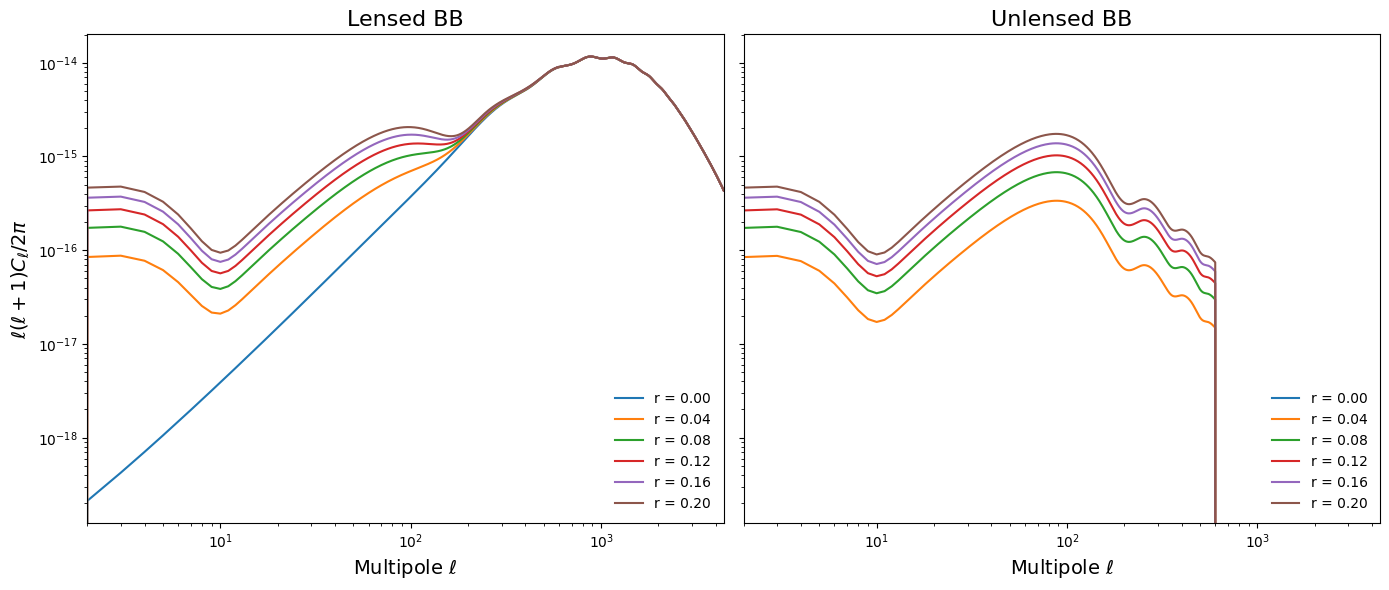

In [8]:
#we create a set of consisting of 6 equally spaced values for tensor to scalar ratio from 0 to 0.2
rs = np.linspace(0,0.2,6)
fig, ax = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Lensed BB
for r in rs:
    inflation_params = initialpower.InitialPowerLaw()
    inflation_params.set_params(ns=0.96, r=r)
    results.power_spectra_from_transfer(inflation_params)
    cl = results.get_total_cls(lmax)   # lensed
    ax[0].loglog(np.arange(lmax+1), cl[:,2], label='r = %.2f' % r)

# Unlensed BB
for r in rs:
    inflation_params = initialpower.InitialPowerLaw()
    inflation_params.set_params(ns=0.96, r=r)
    results.power_spectra_from_transfer(inflation_params)
    cl = results.get_unlensed_total_cls(lmax)   # unlensed
    ax[1].loglog(np.arange(lmax+1), cl[:,2], label='r = %.2f' % r)


ax[0].set_xlim([2, lmax])
ax[0].set_xlabel(r'Multipole $\ell$', fontsize=14)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$', fontsize=14)
ax[0].set_title("Lensed BB", fontsize=16)
ax[0].legend(loc='lower right', frameon=False)

ax[1].set_xlim([2, lmax])
ax[1].set_xlabel(r'Multipole $\ell$', fontsize=14)
ax[1].set_title("Unlensed BB", fontsize=16)
ax[1].legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()

## Part Two: Simplified fake likelihood for some TT data. 
In this section, we will define a very simple likelihood function for CMB temperature (TT) data. The purpose of this fake likelihood is purely pedagogical: it lets us test parameter estimation and model comparison without needing the full, complicated likelihoods used by real experiments like ACT or S4. Later, we can replace it with the actual likelihood.

In [9]:
## Fake likelihood based on realistic high-ell noise for CMB S4 data 

def s4_tt_likelihood(modell,loaddata=True,path=path_to_cmb_notebook_data):
    if loaddata: 
        # if it is the first time, load the data
        data = np.loadtxt('./binned_errors.dat', unpack=True)
    modeltt = np.zeros(len(data[0]))
    inds = (data[0]-0.5) #storing the ℓ values in the array
    inds = inds.astype(int) #rounding off

    # i will contain the index and ind will contain the corresponding ℓ value of the observation data. So we want to store the correspnding theoretical value to be stored in modeltt
    for i,ind in enumerate(inds): 
        modeltt[i] = modell[ind]  
    loglike = (data[1]-modeltt)**2/(2.*data[2]**2) #data[0] → ℓ values, data[1] → measured CMB values, data[2] → error bars
    loglike=-np.sum(loglike,axis=0) #This gives us \chi^2 value.
    return loglike

The first thing to realize is that in a realistic analysis, we **cannot simply take the theoretical model spectrum at the same ℓ values as the observed data**. The reason is that the observational data is usually **binned**—each data point represents an **average over a range of multipoles** rather than a single ℓ. If we ignore this binning, we can introduce systematic errors when comparing theory and data.

### Why binning matters

* Observational experiments like ACT, Planck, or S4 do not measure the CMB power spectrum at every individual multipole. Instead, the measurements are grouped into **bins** to reduce noise and make the data more manageable.
* Each bin contains several ℓ values, and the reported data point is typically an **average of the power spectrum over that bin**.
* If we directly compare the theoretical spectrum at a single ℓ with a binned data point, we are mismatching scales and effectively ignoring the averaging process, which can **bias parameter estimates**.

### Binning the theoretical spectrum

To make a fair comparison, we need to **bin the theoretical spectrum in the same way as the data**:

* We define **bin edges** from a lower bound to an upper bound in ℓ. This will be done by starting from $\ell=500$ to $\ell=2500$ and split them into 20 equal pieces.
* For each bin, we compute the **average of the theoretical spectrum** over all ℓ values that fall within that bin.
* This produces a **binned theory spectrum** that can be directly compared with the binned data.

A common choice is **top-hat binning**, where each bin contributes equally (all ℓ in the bin are weighted the same) to the average. Later, more sophisticated weighting schemes can be used, but the top-hat approach is simple, intuitive, and sufficient for a first exploration.

This binning step ensures that the comparison between model and data is consistent and that the likelihood computation accurately reflects the experimental setup. 


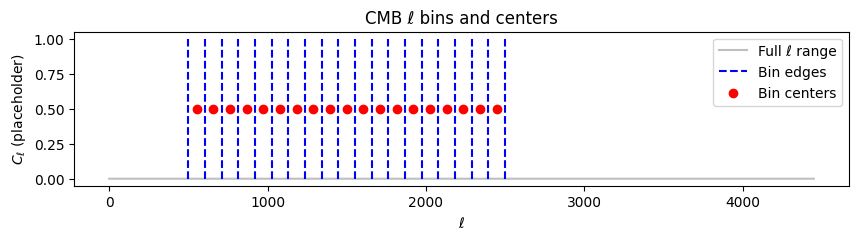

In [14]:
# Read in the ell values for the data. We swant to look at ℓ values between 500 and 2500, divided into 20 bins.
low_bin = 500
high_bin = 2500
nbin = 20

# Now we will create an array and store all the binned ell values and a placeholder array for cls. The first array will store bin edges (21 numbers marking the boundaries of the bins).
ellbin = np.linspace(low_bin,high_bin,nbin) 
#Finds the bin centers by creating an array whose first element is removed and then adds it to the array whose last element is removed. This effectively adds the next element of the array to the current one.
#These are the ℓ-values at which we’ll plot the binned spectrum.
ellmids = 0.5 * (ellbin[1:] + ellbin[:-1])  

# Plotting
plt.figure(figsize=(10, 2))
plt.plot(ls, np.zeros_like(ls), label='Full ℓ range', color='gray', alpha=0.5)
plt.vlines(ellbin, ymin=0, ymax=1, color='blue', linestyle='--', label='Bin edges')
plt.scatter(ellmids, np.zeros(len(ellmids)) + 0.5, color='red', label='Bin centers')  # small offset for visibility

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$ (placeholder)')
plt.title('CMB ℓ bins and centers')
plt.legend()
plt.show()

This part of the code is a bit more involved, so we’ll explain it carefully.

We are looping over all the bins, from 0 to `len(ellmids)-1`. For each bin, we take the two consecutive bin edges, $\ell_c$ and $\ell_{c+1}$, and find all multipole values $\ell$ from our theoretical spectrum `ls` that lie within this range:

$$
\ell_c < \ell \le \ell_{c+1}
$$

The indices of these multipoles are stored in a variable called `inds`. We then compute the **mean of all the $C_\ell$ values** corresponding to these indices and store it in the array `clttbin`. This gives the binned $C_\ell$ for that bin.

Next, we convert these binned $C_\ell$ values into $D_\ell$, defined as

$$
D_\ell^{\text{bin}} = \frac{\ell_\text{mid}^2}{2\pi} C_\ell^{\text{bin}}, \quad \text{with } \ell_\text{mid} = \frac{\ell_c + \ell_{c+1}}{2}.
$$

Finally, we plot the **unbinned $D_\ell$** (from `totCL`) as a continuous curve and the **binned $D_\ell$** as points at the bin centers. This allows us to visually compare the binned spectrum with the original high-resolution theoretical spectrum.

/tmp/ipykernel_76587/1374509659.py:5: RuntimeWarning: invalid value encountered in divide
  cl_tt = 2*np.pi*CMBOutscale*totCL[:,0]/(ls*(ls+1))


(550.0, 2500.0, 0.0, 2500.0)

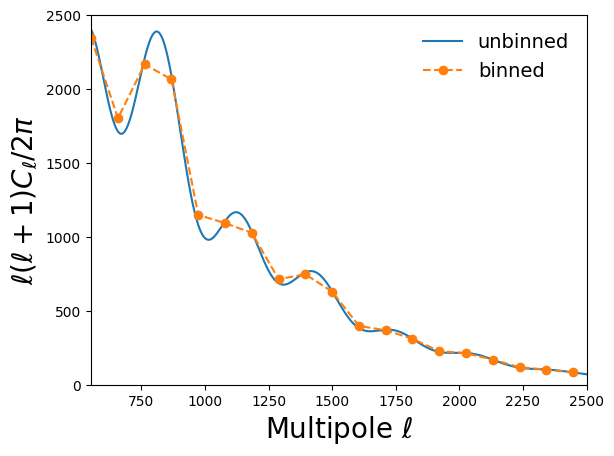

In [16]:
clttbin = np.zeros(len(ellmids)) #An empty array of same size as l_mid for the binned C_ℓ

# First we need to make sure that the theory power spectra are in Cls and not Dl = l^2Cl/2pi
dl_tt = CMBOutscale*totCL[:,0]
cl_tt = 2*np.pi*CMBOutscale*totCL[:,0]/(ls*(ls+1))

for c in range(len(ellbin)-1):
    inds = np.where((ellbin[c]<ls)& (ellbin[c+1]>=ls))[0] #returns the indices of ls where this condition is true and stores them in "inds".
    clttbin[c] = np.mean(cl_tt[inds]) #calculate the mean of all the values of cl_tt at those indices.

# Now transform the Cl values back to Dl
dlttbin = ellmids**2*clttbin/(2*np.pi)

#plot
plt.plot(ls,dl_tt, label= 'unbinned')
plt.plot(ellmids,dlttbin, marker='o', linestyle='--', label= 'binned')
plt.legend(frameon=False, fontsize=14) 
plt.xlabel(r'Multipole $\ell$', fontsize=20)
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$', fontsize=20)
plt.axis([550,2500,0,2500])

## Implementing Binning Inside the Likelihood

In realistic analyses, the **binning of data is often handled directly inside the likelihood function**. This ensures that the theoretical prediction is averaged over the same ℓ ranges as the data before comparison. The code below implements such a “binned likelihood” for CMB TT data.

* It prevents systematic biases that would appear if you compared the theory at a single ℓ to a binned data point.
* This approach is the basis for real likelihoods used in experiments like Planck, ACT, or S4, where binning is essential due to noise and covariance.


In [17]:
## Fake likelihood based on realistic high-ell noise for CMB S4 data 

def s4_tt_likelihood_binned(modell,loaddata=True,path=path_to_cmb_notebook_data):
    if loaddata: 
        # if it is the first time, load the data
        data = np.loadtxt('./binned_errors.dat', unpack=True)
    # The model array which we'll use for calculations
    modeltt = np.zeros(len(data[0]))
    # The multipole moments, ℓ values, from 0 to len(modell) - 1. This will be calculates from theory.
    model_ell = np.arange(len(modell))
    
    # Now we assume that the data set gives us the mid points. So we need to create the bin edges, i.e. we have to go in reverse order here. 
    midpt_ells = data[0]
    # Calculating the bin half-width, assuming equal spacing
    delta_ell = np.mean(np.diff(midpt_ells)) / 2
    
    # Create the lower edges of the bins by subtracting from the mid points the bin width.
    ell_bins = midpt_ells - delta_ell
    
    # Set the first bin's lower edge to 10, as specified
    ell_bins[0] = 10

    # Append the upper edge of the last bin to complete the array
    ell_bins = np.append(ell_bins, midpt_ells[-1] + delta_ell)
    # converting to Cl before averaging
    cltt = 2*np.pi*modell/(model_ell*(model_ell+1))
    
    for i in range(len(ell_bins)-1): #the loop runs from 0 to len(data)-1 over index and its respective binned ℓ value
        inds = np.where((model_ell > ell_bins[i])& (model_ell <= ell_bins[i+1]))[0]
        modeltt[i] = np.mean(cltt[inds]) #calculates the theoretical binned C_l values
        
    # converting back to Dl to do the chi^2 computation
    modeltt = data[0]**2*modeltt/(2*np.pi) #(l^2/2\pi)C_l
    loglike = (data[1]-modeltt)**2/(2.*data[2]**2) #data[0] → ℓ values, data[1] → measured binned CMB values, data[2] → error bars
    loglike=-np.sum(loglike,axis=0)
    return loglike

# Let's compare

In [18]:
loglike = s4_tt_likelihood(dl_tt)
loglike_binned = s4_tt_likelihood_binned(dl_tt)
print("Without Binning:",loglike)
print('With Binning   :',loglike_binned)

Without Binning: -5109.814457107002
With Binning   : -5449.956794572602


/tmp/ipykernel_76587/1946951638.py:26: RuntimeWarning: invalid value encountered in divide
  cltt = 2*np.pi*modell/(model_ell*(model_ell+1))


Note the difference between the two results run on the same data vector

### Moving to Real Data

So far, we’ve been testing our CMB analysis using simplified or fake likelihoods, which are great for learning but don’t capture the complexities of real experiments. Now, we’re stepping up to **real observational data from ACT**.

The idea is simple: we take the **best-fit theoretical spectrum provided by ACT** and see how well it matches their measured TT and EE power spectra. Real experiments have small but important effects, like **beam uncertainties**, which are captured by parameters such as `yp2`. By slightly adjusting this parameter, we can check how sensitive the likelihood is to calibration.

This lets us do two things at once:

1. Quantify the goodness-of-fit of a real model using actual CMB measurements.
2. Visualize the TT and EE spectra to get an intuitive feel for which scales (multipoles) dominate the fit and where experimental effects matter.

In short, this section bridges theory and observation, moving from a “toy model” approach to a **realistic comparison with data**, which is exactly what cosmologists do when testing models against the universe.

ACT only chi2 = 279.005057627002
Expected:       279.005057627002


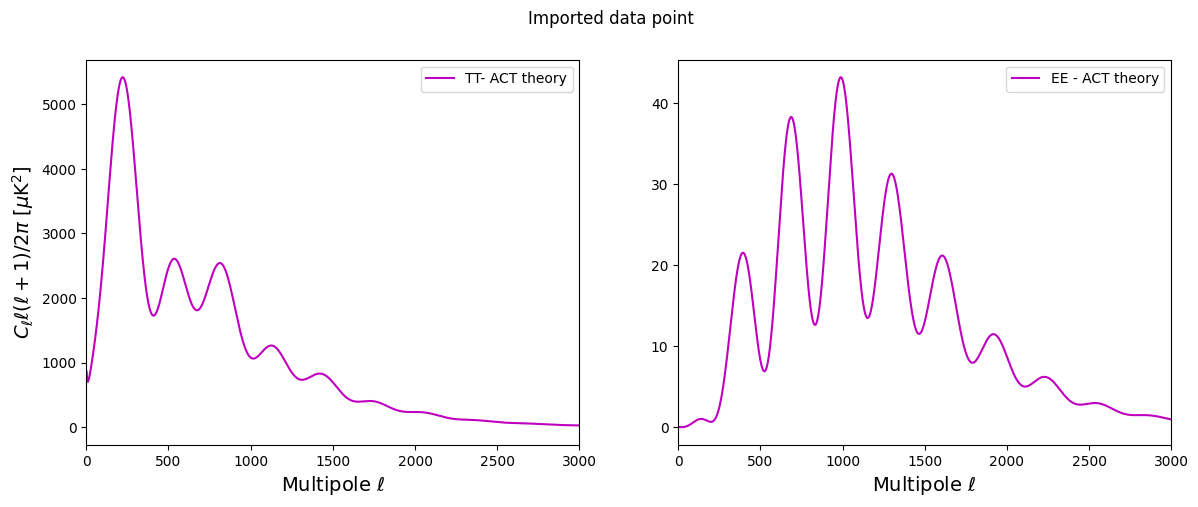

In [33]:
import pyactlike
like = pyactlike.ACTPowerSpectrumData()
# Read in the act only spectra
filename = like.data_dir + "/bf_ACTPol_lcdm.minimum.theory_cl"

tt_lmax = 6000
ell, dell_tt, dell_te, dell_ee = np.genfromtxt( #numpy.genfromtxt is a function within the NumPy library in Python, used for reading data from text files and converting it into a NumPy array
    filename,
    delimiter=None,
    unpack=True,
    max_rows=tt_lmax - 1,
    usecols=(0, 1, 2, 3),
)

# Set the new yp2 value.  This parameter relates to the ACT's beam uncertainty, which is a crucial aspect of the instrument's calibration. 
# This parameter is used to adjust the theoretical power spectra to match the observed data.
yp2_act_only = 1.001

# Now let's look at the chi2 using pyactlike
actdata = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * actdata.loglike(dell_tt, dell_te, dell_ee, yp2_act_only)
print("ACT only chi2 = " + "{0:.12f}".format(chi2))
print("Expected:       279.005057627002")

# --- Plot TT and EE spectra from imported file ---
plt.figure(figsize=(14,5))

# TT
plt.subplot(1,2,1)
plt.plot(ell, dell_tt, "-", color='m', label="TT- ACT theory")
plt.ylabel(r"$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]", fontsize=14)
plt.xlabel(r"Multipole $\ell$", fontsize=14)
plt.legend()
plt.xlim(0,3000)

# EE
plt.subplot(1,2,2)
plt.plot(ell, dell_ee, "-", color='m', label="EE - ACT theory")
plt.xlabel(r"Multipole $\ell$", fontsize=14)
plt.legend()
plt.xlim(0,3000)

plt.suptitle("Imported data point")
plt.show()


### Comparing Theory with ACT Data for the Wide Patch

Now that we have the ACT likelihood and data loaded, the next step is to **compare our theoretical predictions to the measured CMB spectra**. Specifically, we focus on the **TT, TE, and EE spectra** in the so-called **“wide” patch** of the sky, which is a part of the ACT survey with relatively low noise and good coverage.

To make this comparison meaningful, we need three pieces of information for each spectrum:

1. **The multipole moments ($\ell$)** – these tell us the angular scales at which the measurements were made.
2. **The observed power spectrum values** – in ACT data these are originally stored as $C_\ell$, but for visualization and comparison it is common to convert them to $D_\ell = \ell(\ell+1) C_\ell / 2\pi$.
3. **The corresponding errors** – these indicate the uncertainty of each measurement, and must be converted to the same $D_\ell$ units as the theory for a proper comparison.

By selecting the appropriate indices in the data arrays (`wmin` to `wmax`), we isolate the **TT bins for the wide patch**. The code then converts the raw $C_\ell$ values and their errors to $D_\ell$, which are the standard units used in CMB plots.

This preparation ensures that when we plot or compute likelihoods, the **theoretical spectra and observed data are directly comparable** on the same angular scales and in the same units. It’s a critical step before any meaningful chi-squared or likelihood calculation.

In [56]:
print("Length of actdata.X_data:", len(actdata.X_data))
print("Length of actdata.X_sig :", len(actdata.X_sig))
print("Length of actdata.bval  :", len(actdata.bval))

Length of actdata.X_data: 260
Length of actdata.X_sig : 260
Length of actdata.bval  : 260


### Understanding the ACT Data Structure

The `pyactlike.ACTPowerSpectrumData()` object gives us a **single concatenated array of length 260** containing all the binned power spectrum measurements. These entries are organized by **spectrum type (TT, TE, EE)** and by **patch**:

* **TT bins:** indices `0–40` and `130–170`
* **TE bins:** indices `40–85` and `170–215`
* **EE bins:** indices `85–130` and `215–260`

This structure means that each spectrum and patch occupies a **specific contiguous block of indices** in the array.

For our analysis, we will:

1. Start with the **TT spectrum**: look at both the ACT fit (theoretical best-fit) and the measured data points.
2. Then move on to **TE and EE spectra**, examining both their fits and residuals.
3. Use this understanding to **study how well the theoretical model matches the data** before attempting to adjust parameters or fit the model ourselves.

By following this structured approach, we can clearly visualize each spectrum, understand the residuals, and identify which multipoles or patches contribute most to the fit.

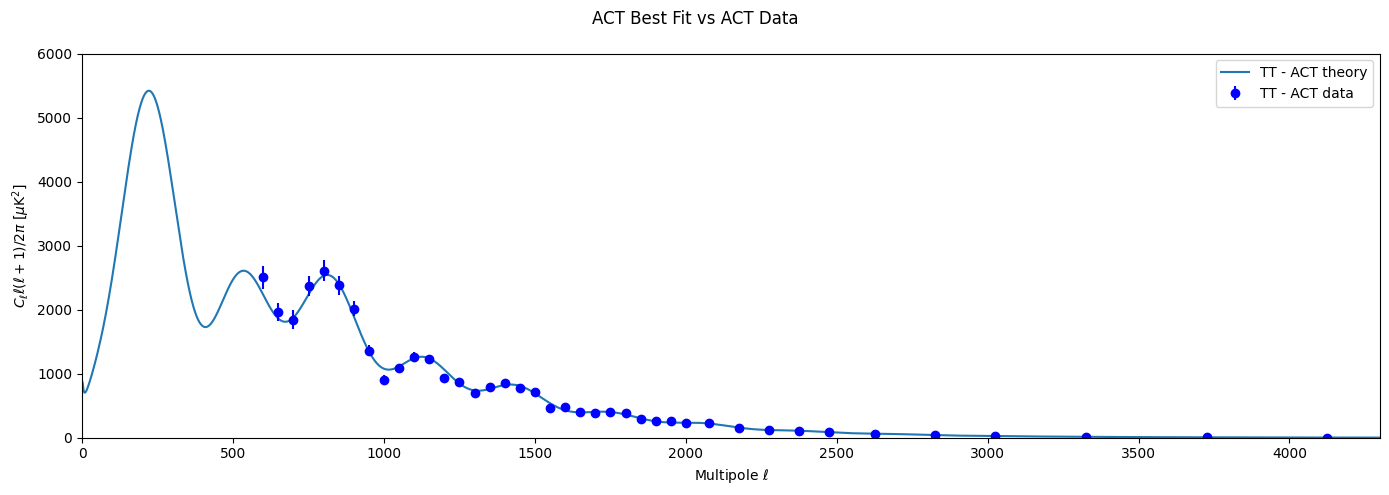

In [60]:
wmin=130 #first element of TT data vector for wide patch
wmax=wmin+40 #last element of TT for wide patch

# Read in the ell values for the data
TT_bval=actdata.bval[wmin:wmax]

# Compute the Dl values using Dl = cl*ell*(ell+1)/(2*pi) 
TT_dat=actdata.X_data[wmin:wmax]*(like.bval[wmin:wmax]+1)*like.bval[wmin:wmax]/(2.*np.pi)

# Read in the error which also needs to be converted to an error in Dl
TT_err=actdata.X_sig[wmin:wmax]*(like.bval[wmin:wmax]+1)*like.bval[wmin:wmax]/(2.*np.pi)

# Now we can plot this data along with the theory from above 
plt.figure(figsize=(14,5))

# --- TT plot ---
plt.plot(ell, dell_tt, "-", label="TT - ACT theory")
plt.errorbar(TT_bval, TT_dat, yerr=TT_err, fmt='bo', label="TT - ACT data")
plt.xlabel(r"Multipole $\ell$")
plt.ylabel(r"$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]")
plt.xlim(0,4300)
plt.ylim(0,6000)
plt.legend()


plt.suptitle("ACT Best Fit vs ACT Data")
plt.tight_layout()
plt.show()

By eye this looks pretty good, our data points seem to fit our theory extremely well.  We can test this more explicitly by looking at the residuals and printing out a simplified diagonal $\chi^2$.  It's worth noting that in order to get the full $\chi^2$ one would need to use the full likelihood (with `like.loglike`) instead of this simplified version.

Now identify the bandpower window functions to bin the theory, plot residuals, and also print simplified diagonal $\chi^2$ (again, for fully-accurate $\chi^2$, use the full likelihood!). First, we obtain a binned theory spectrum, to compare with the binned data stored inside `like`:

(-100.0, 70.0)

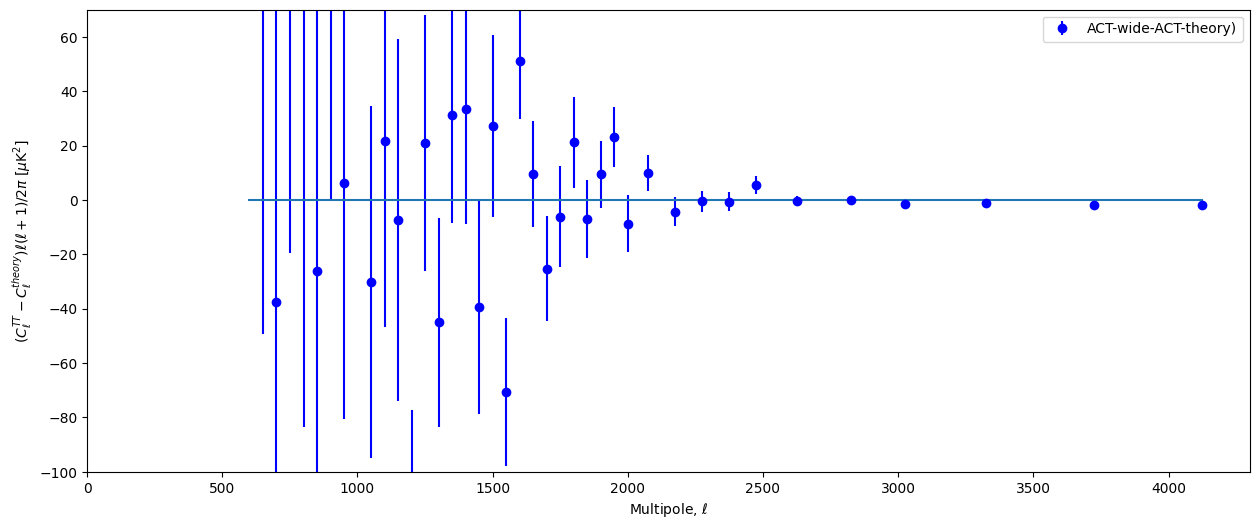

In [75]:
# We begin by creating an array of ell values the range from 2 to 5000
l_list = np.array(range(2, like.tt_lmax + 1))

# Our data above was binned and so in order to compare to theory we 
# will need to similarly bin the theory curve from above

# Start by reading in the Dl values annd converting to cls
cltt = np.zeros(like.lmax_win)
cltt[1 : actdata.tt_lmax] = (dell_tt[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)

# now we bin these cl values just as we did for the data above
bmax, lmax_win = actdata.bmax, actdata.lmax_win
cth_tt = actdata.win_func_w[2 * bmax : 3 * bmax, 1:lmax_win] @ cltt[1:lmax_win] 

# We convert the binned cl values back to binned Dl by multiplying through by l(l+1)/2pi
dth_tt = cth_tt[actdata.b0:actdata.b0+actdata.nbintt]*(actdata.bval[wmin:wmax]+1)*actdata.bval[wmin:wmax]/(2.*np.pi) 

# Now we have binned data and binned theory and so can plot the residuals
plt.figure(figsize=(15,6))
plt.errorbar(TT_bval,TT_dat-dth_tt,yerr = TT_err, fmt='bo',label="ACT-wide-ACT-theory)")
plt.plot(TT_bval, (TT_dat-dth_tt)*0.)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{TT}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)
plt.ylim(-100,70)

Finally, from the residuals and errors we loaded earlier, we can evaluate our "diagonal" $\chi^2$:

In [24]:
# We can also find the chisq of this binned data and print it out
chi_act_TT = (TT_dat-dth_tt)**2/TT_err**2
print("ACT TT-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_TT))+ " for 40 data points")

ACT TT-wide diagonal chi2 = 39.28 for 40 data points


### Repeating for TE, EE

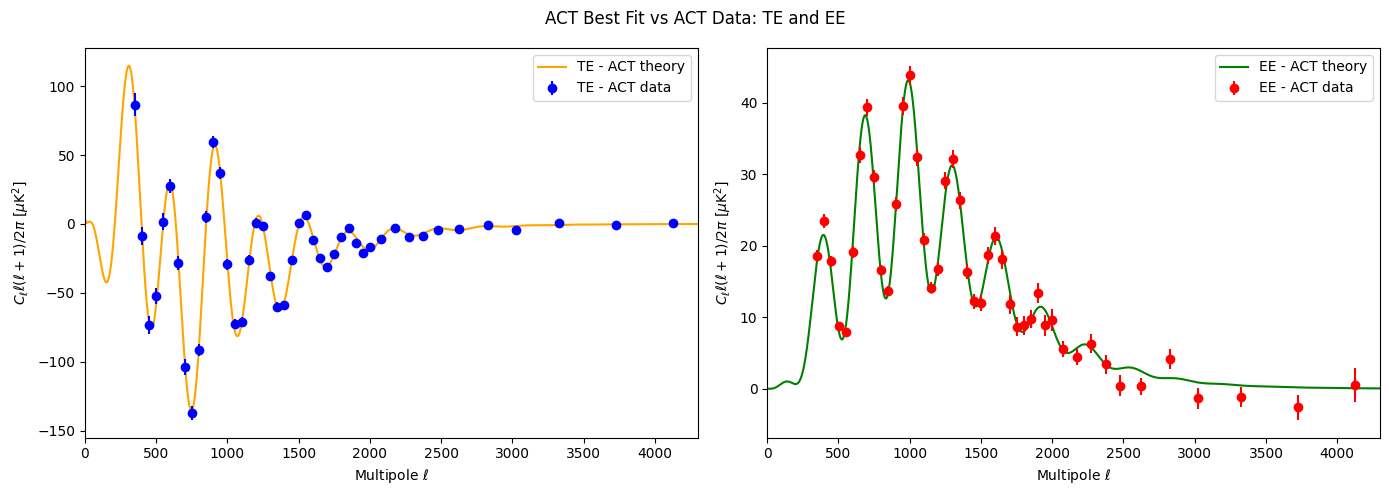

In [69]:
wmin_TE, wmax_TE= 130+40, 130+40+45   #set the bounds for TE from 170 to 215
wmin_EE, wmax_EE= 130+85, 130+85+45   #set the bounds for EE from 215 to 260

# As before we read in the ell, Dl, and error values
# For TE
TE_bval=like.bval[wmin_TE:wmax_TE]
TE_dat=like.X_data[wmin_TE:wmax_TE]*like.bval[wmin_TE:wmax_TE]*(like.bval[wmin_TE:wmax_TE]+1)/(2.*np.pi)
TE_err=like.X_sig[wmin_TE:wmax_TE]*like.bval[wmin_TE:wmax_TE]*(like.bval[wmin_TE:wmax_TE]+1)/(2.*np.pi)

# For EE
EE_bval=like.bval[wmin_EE:wmax_EE]
EE_dat=like.X_data[wmin_EE:wmax_EE]*like.bval[wmin_EE:wmax_EE]*(like.bval[wmin_EE:wmax_EE]+1)/(2.*np.pi)
EE_err=like.X_sig[wmin_EE:wmax_EE]*like.bval[wmin_EE:wmax_EE]*(like.bval[wmin_EE:wmax_EE]+1)/(2.*np.pi)

# --- Plot TE and EE ---
plt.figure(figsize=(14,5))

# TE
plt.subplot(1,2,1)
plt.plot(ell, dell_te, '-', color='orange', label='TE - ACT theory')
plt.errorbar(TE_bval, TE_dat, yerr=TE_err, fmt='bo', label='TE - ACT data')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]')
plt.legend()
plt.xlim(0, 4300)

# EE
plt.subplot(1,2,2)
plt.plot(ell, dell_ee, '-', color='green', label='EE - ACT theory')
plt.errorbar(EE_bval, EE_dat, yerr=EE_err, fmt='ro', label='EE - ACT data')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]')
plt.legend()
plt.xlim(0, 4300)

plt.suptitle("ACT Best Fit vs ACT Data: TE and EE")
plt.tight_layout()
plt.show()


The binned version of above:

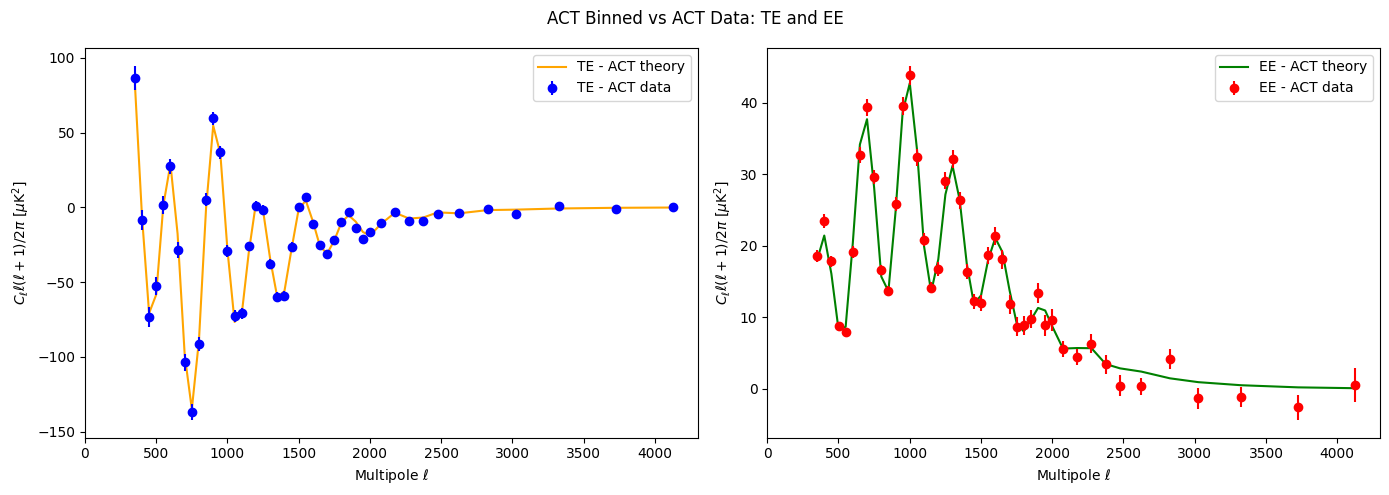

In [71]:
# Start by binning the EE thoery
clee = np.zeros(like.lmax_win)
clee[1 : like.tt_lmax] = (dell_ee[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
bmax, lmax_win = like.bmax, like.lmax_win
cth_ee = like.win_func_w[9 * bmax : 10 * bmax, 1:lmax_win] @ clee[1:lmax_win] 
dth_ee = cth_ee[:like.nbinee]*like.bval[wmin_EE:wmax_EE]*(like.bval[wmin_EE:wmax_EE]*+1)/(2.*np.pi) 

# Next let's bin the TE theory
clte = np.zeros(like.lmax_win)
clte[1 : like.tt_lmax] = (dell_te[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
bmax, lmax_win = like.bmax, like.lmax_win
cth_te = like.win_func_w[6 * bmax : 7 * bmax, 1:lmax_win] @ clte[1:lmax_win] 
dth_te = cth_te[:like.nbinte]*like.bval[wmin_TE:wmax_TE]*(like.bval[wmin_TE:wmax_TE]+1)/(2.*np.pi) 

# --- Plot TE and EE ---
plt.figure(figsize=(14,5))

# TE
plt.subplot(1,2,1)
plt.plot(TE_bval, dth_te, '-', color='orange', label='TE - ACT theory')
plt.errorbar(TE_bval, TE_dat, yerr=TE_err, fmt='bo', label='TE - ACT data')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]')
plt.legend()
plt.xlim(0, 4300)

# EE
plt.subplot(1,2,2)
plt.plot(EE_bval, dth_ee, '-', color='green', label='EE - ACT theory')
plt.errorbar(EE_bval, EE_dat, yerr=EE_err, fmt='ro', label='EE - ACT data')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]')
plt.legend()
plt.xlim(0, 4300)

plt.suptitle("ACT Binned vs ACT Data: TE and EE")
plt.tight_layout()
plt.show()


ACT TE-wide diagonal chi2 = 40.77 for 45 data points
ACT EE-wide diagonal chi2 = 59.32 for 45 data points


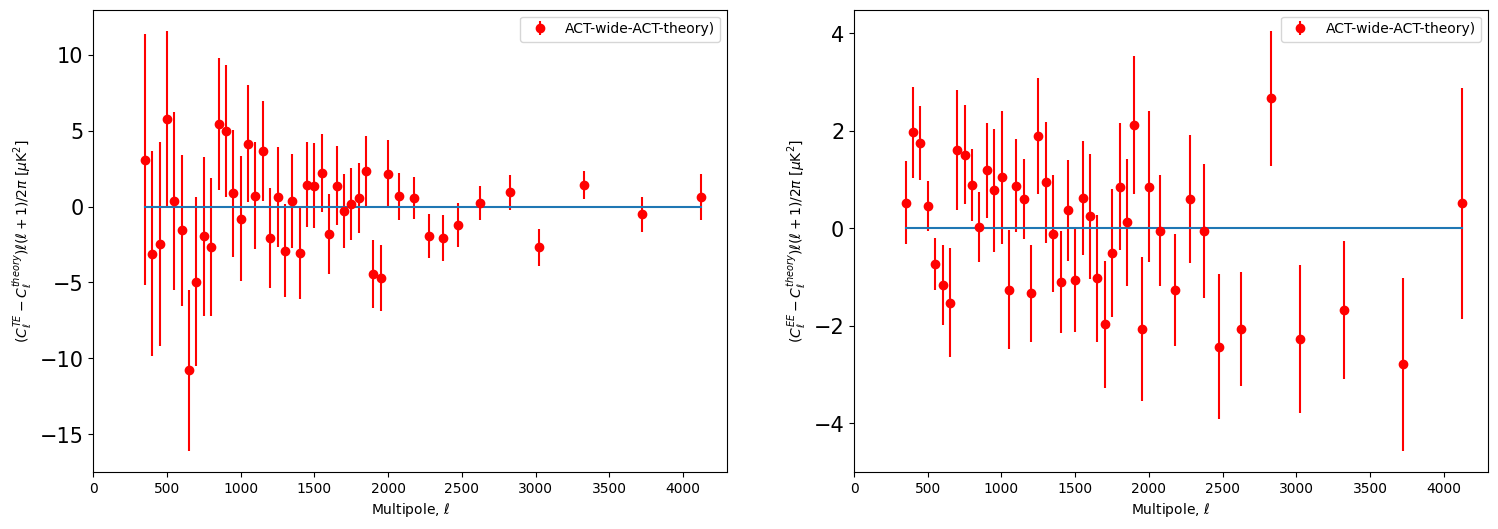

In [64]:
# Plot the residuals
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.errorbar(TE_bval,TE_dat-dth_te,yerr = TE_err, fmt='ro',label="ACT-wide-ACT-theory)")
plt.plot(TE_bval, (TE_dat-dth_te)*0.)
plt.yticks(fontsize=15)
plt.xlim(0,4300)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{TE}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(EE_bval,EE_dat-dth_ee,yerr = EE_err, fmt='ro',label="ACT-wide-ACT-theory)")
plt.plot(EE_bval, (EE_dat-dth_ee)*0.)
plt.yticks(fontsize=15)
plt.xlim(0,4300)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{EE}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()

# Print out the chi^2 values
chi_act_TE = (TE_dat-dth_te)**2/TE_err**2
print("ACT TE-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_TE))+ " for 45 data points")

chi_act_EE = (EE_dat-dth_ee)**2/EE_err**2
print("ACT EE-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_EE))+ " for 45 data points")

# Stepping in parameter space
We are now going to explore generating different model 'universes' to fit the data. We will randomly start with an initial guess and try to see how the guess fits the data. From there, we will find the step into parameter space and explore where in parameter space the data is best described. 

In [27]:
# first generate an arbitrary set of spectra from CAMB
cosmo_params = camb.model.CAMBparams()

# set H0 to the ACT+WMAP best-fit result, set the universe curvature to be slightly positive
# set lmax for this simulation to match the rest of the notebook 
cosmo_params.set_cosmology(H0 = 67.9, omk = 0.1)
cosmo_params.set_for_lmax(6000)

# retrieve the spectra
res = camb.get_results(cosmo_params)
spectra = res.get_cmb_power_spectra(params = cosmo_params, spectra = ('total',), CMB_unit = 'muK')['total']

We can plot what our new model looks like (visually it is hard to tell the difference to our ACT-only maximum likelihood theory), but against the data the problem is clear:

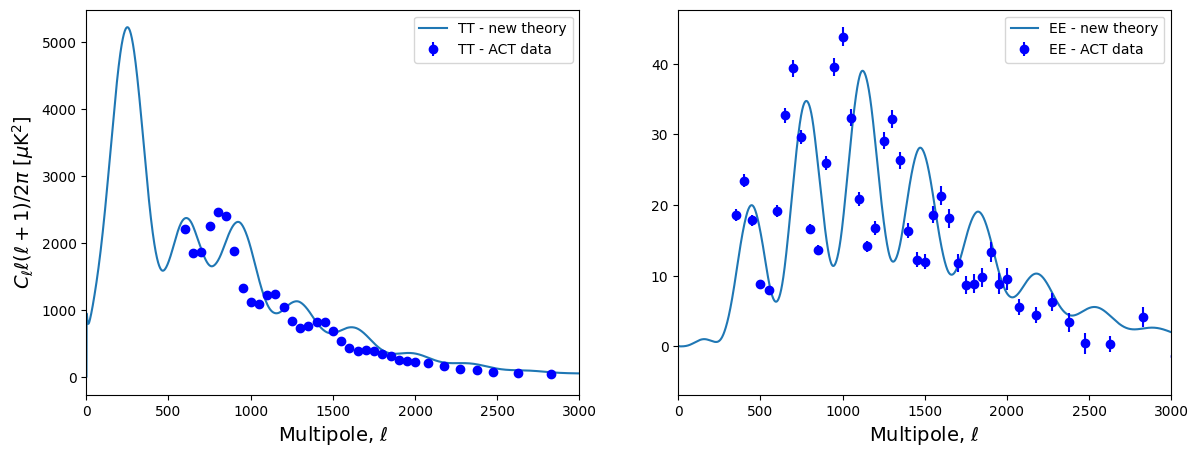

In [28]:
# we can plot the new, theory spectra as before
ell_new = np.arange(spectra.shape[0]) #array of multipole indices ℓ=0,1,2,… up to the max computed by CAMB
dell_tt_new, dell_ee_new, dell_bb_new, dell_te_new = spectra.T #transposes the spectra array so each row corresponds to TT, EE, BB, TE.

plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.plot(ell_new, dell_tt_new, "-", label="TT - new theory") #Plotting the CAMB spectra using the initial guess
plt.errorbar(TT_bval,TT_dat,yerr = TT_err, fmt='bo',label="TT - ACT data") #Plotting the data points
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$", fontsize = 14)
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend()
plt.xlim(0,3000)

plt.subplot(1,2,2)
plt.plot(ell_new, dell_ee_new, "-", label="EE - new theory")
plt.errorbar(EE_bval,EE_dat,yerr = EE_err, fmt='bo', label="EE - ACT data")
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend()
plt.xlim(0,3000)

plt.show()

### Comparing the Initial Guess to the Data

From the plot, it’s immediately clear that our **initial theoretical spectrum** does not align well with the measured ACT data points — the amplitudes and shapes of the curves are noticeably different.

To quantify this mismatch, we can use:

1. **Chi-squared test ($\chi^2$)**:

   * Measures the sum of the squared differences between the observed data and the theoretical prediction, weighted by the experimental uncertainties.
   * A high $\chi^2$ indicates a poor fit, while a low value suggests the theory is consistent with the data.

2. **Likelihood function**:

   * Computes the probability of observing the data given the theoretical model.
   * Lower likelihood corresponds to worse agreement, higher likelihood to better agreement.

By calculating $\chi^2$ or the likelihood, we can **objectively confirm** that our initial parameter guess is far from the best fit, rather than relying solely on visual inspection.

In [29]:
paramsvec=np.array([67.5,0.022, 0.122, 0, 0.06, 0.965])
pars = camb.CAMBparams()
pars.set_cosmology(H0=paramsvec[0], ombh2=paramsvec[1], omch2=paramsvec[2], mnu=0.06, omk=paramsvec[3], tau=paramsvec[4])
pars.InitPower.set_params(ns=paramsvec[5], r=0)
pars.set_for_lmax(4400, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars)
totCL=powers['total']
model = totCL
cltt = totCL[:,0]*CMBOutscale
loglike = s4_tt_likelihood(cltt)
print(loglike)

-5109.814457107002


## Computing the $\chi^2$ for the ACT likelihood confirms this

In [30]:
# Look at the chi2 using pyactlike
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt_new, dell_te_new, dell_ee_new, yp2_act_only)
print("ACT only chi2 = " + "{0:.12f}".format(chi2))
print("Expected:       279.004901885481")

ACT only chi2 = 34337.692796804666
Expected:       279.004901885481


### Stepping in Parameter Space

So far, we have evaluated the likelihood using a single set of cosmological parameters. To actually **explore the parameter space** and find the best-fit values, we need to systematically vary the parameters and see how the likelihood changes.

In this step, we:

1. **Define a step vector** in the **6-dimensional parameter space** (e.g., $[H_0, \Omega_b h^2, \Omega_c h^2, \Omega_\nu h^2,K, \tau]$). Each component specifies how much we want to change that parameter from its current value.

2. **Call CAMB with the new parameter vector**:
   * CAMB generates the theoretical power spectra corresponding to this new point in parameter space.

3. **Compute the log-likelihood** of this new model relative to the data:
   * This tells us if the step improved the fit (higher likelihood) or made it worse (lower likelihood).

By repeating this process, we can **navigate the high-dimensional parameter space**, moving toward regions where the theoretical model better matches the observations. This is the basic idea behind **likelihood-based parameter estimation and MCMC methods** used in cosmology.

In [26]:
paramsvec=np.array([67.9,0.022, 0.122, 0, 0.06, 0.965]) 
# Using this code above, we can take a gaussian step specified by the step vector below
stepvec = np.array([0.1,0.0001, 0.0001, 0, 0.005, 0.001])
nsteps = 2
loglike = np.zeros(nsteps)
for i in range(nsteps):
    # The if-else condition will set the value of step.
    if i==0:
        # First step
        step = paramsvec
    else:
        # Take a Gaussian step from the previous position. Here, np.random.randn will generate an array of random number. 
        # We will take that many steps using stepvec in parameter space
        step = step+np.random.randn(len(paramsvec))*stepvec 
    # Initialise the CMAB params for each value of step.
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=step[0], ombh2=step[1], omch2=step[2], mnu=0.06, omk=step[3], tau=step[4])
    pars.InitPower.set_params(ns=step[5], r=0)
    pars.set_for_lmax(4400, lens_potential_accuracy=0)
    # Compute the spectra
    powers =results.get_cmb_power_spectra(pars)
    totCL=powers['total']
    model = totCL
    cltt = totCL[:,0]*CMBOutscale
    loglike[i] = s4_tt_likelihood(cltt)
print('loglike vector =', loglike)

loglike vector = [-5337.06198726 -8180.41924491]


## Part Four: Preliminaries of MCMC
We are now ready to do the MCMC. We'll define the simplest/ugliest version of the Metropolis Hastings algorithm:

In [27]:
def mcmc_mh(ratln): #ratln will be our ratio of log likelyhood function.
    accept=False
    r1 = np.random.rand()
    # If the step is definitely better, we want to accept it.
    # If it isn't necessarily better, we want to throw a random number and step if we exceed it
    if np.exp(ratln) > r1: #If the ratio is less than any random number between 0 and 1 then we need to keep exploring the parameter space.
        accept=True
    return accept

Following code will explore the parameter space

In [28]:
# Using this code above, we can take a gaussian step specified by the step vector below
stepvec = np.array([0.1,0.0001, 0.0001, 0, 0.005, 0.001])
# stepvec = np.array([0.1,0, 0, 0, 0, 0])

steps = 100
loglike = np.zeros(steps)
stepskeep = np.zeros((steps,len(paramsvec)+1))
for i in range(steps):
    
    if i==0:
        step = paramsvec
        accept=True
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=step[0], ombh2=step[1], omch2=step[2], mnu=0.06, omk=step[3], tau=step[4])
        pars.InitPower.set_params(ns=step[5], r=0)
        pars.set_for_lmax(4400, lens_potential_accuracy=0)
        powers =results.get_cmb_power_spectra(pars)
        totCL=powers['total']
        model = totCL
        cltt = totCL[:,0]*CMBOutscale
        loglike[i] = s4_tt_likelihood(cltt)
        #print loglike[i]
        stepskeep[i,0:len(paramsvec)] = step
        stepskeep[i,len(paramsvec)]= loglike[i]
    else:
        
        step = stepskeep[i-1,0:len(paramsvec)]+np.random.randn(len(paramsvec))*stepvec 
        #print step
        pars = camb.CAMBparams()
        # Put the param vector into the camb structure
        pars.set_cosmology(H0=step[0], ombh2=step[1], omch2=step[2], mnu=0.06, omk=step[3], tau=step[4])
        pars.InitPower.set_params(ns=step[5], r=0)
        pars.set_for_lmax(4400, lens_potential_accuracy=0)
        # compute the power spectrum
        powers =results.get_cmb_power_spectra(pars)
        totCL=powers['total']
        model = totCL
        cltt = totCL[:,0]*CMBOutscale
        # compute the likelihood
        loglike[i] = s4_tt_likelihood(cltt)
        rat = loglike[i]-loglike[i-1]
        accept = mcmc_mh(rat)
        
        if accept:   
            stepskeep[i,0:len(paramsvec)] = step
            stepskeep[i,len(paramsvec)] = loglike[i]
        else:
            stepskeep[i,0:len(paramsvec)] = stepskeep[i-1,0:len(paramsvec)]
            loglike[i] = loglike[i-1]
            stepskeep[i,len(paramsvec)] = loglike[i]
        
    
            
np.savetxt('chain.txt', stepskeep, delimiter=' ', fmt='%.3e')
print('we are done')

/tmp/ipykernel_1209/1303072224.py:6: RuntimeWarning: overflow encountered in exp
  if np.exp(ratln) > r1: #If the ratio is less than any random number between 0 and 1 then we need to keep exploring the parameter space.


we are done


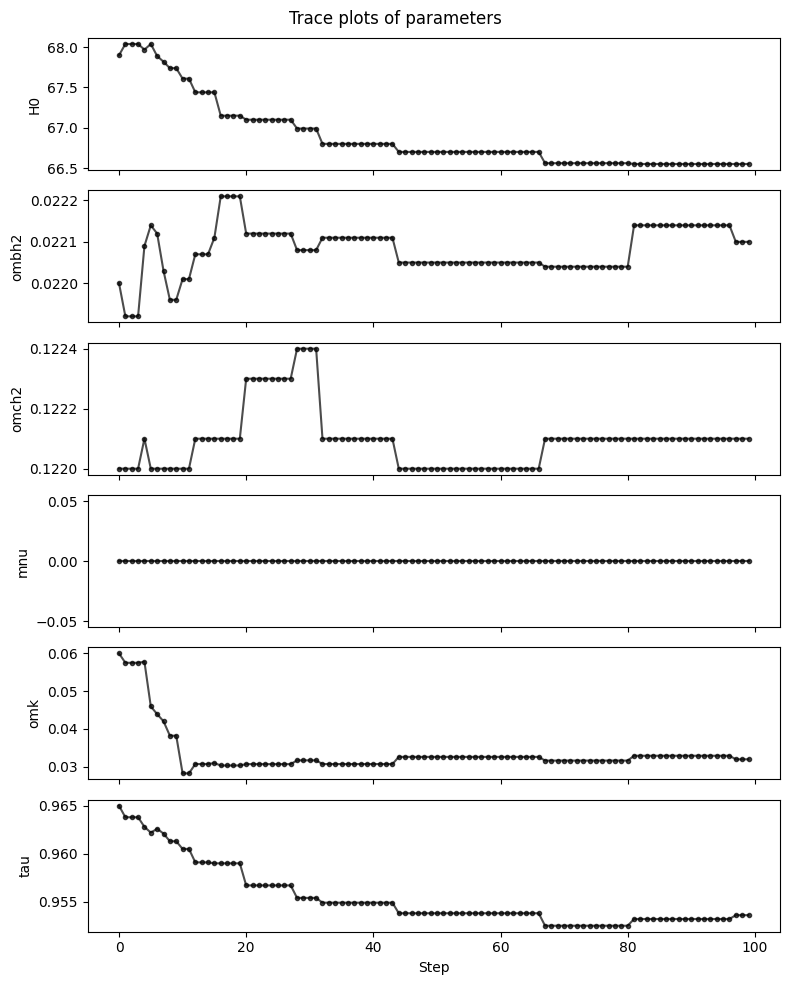

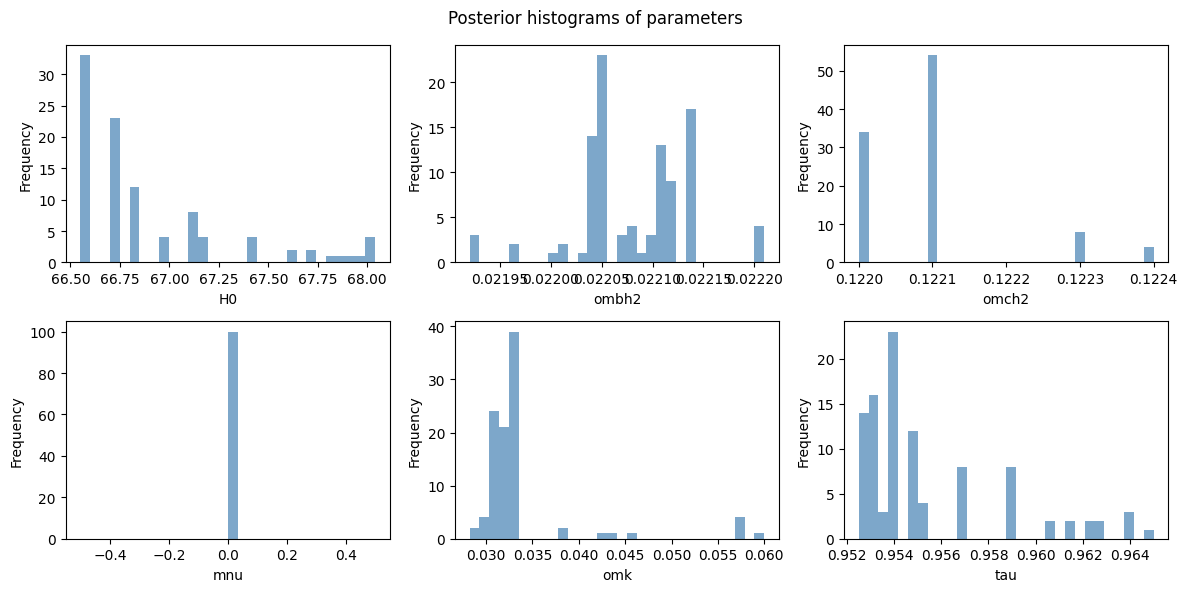

In [29]:
# Load chain
chain = np.loadtxt("chain.txt")
params = chain[:, :-1]   # all but last column
loglike = chain[:, -1]

param_names = ["H0", "ombh2", "omch2", "mnu","omk", "tau"]

# --- 1. Trace plots ---
fig, axes = plt.subplots(len(param_names), 1, figsize=(8, 10), sharex=True)
for i, name in enumerate(param_names):
    axes[i].plot(params[:, i], "k.-", alpha=0.7)
    axes[i].set_ylabel(name)
axes[-1].set_xlabel("Step")
plt.suptitle("Trace plots of parameters")
plt.tight_layout()
plt.show()

# --- 2. Histograms for all parameters ---
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()
for i, name in enumerate(param_names):
    axes[i].hist(params[:, i], bins=30, alpha=0.7, color="steelblue")
    axes[i].set_xlabel(name)
    axes[i].set_ylabel("Frequency")
plt.suptitle("Posterior histograms of parameters")
plt.tight_layout()
plt.show()


We will now use the bestfit values found from MCMC and see how good the newly found values are in terms of describing the data.

Best-fit parameters: [6.68955e+01 2.20809e-02 1.22094e-01 0.00000e+00 3.35384e-02 9.55404e-01]


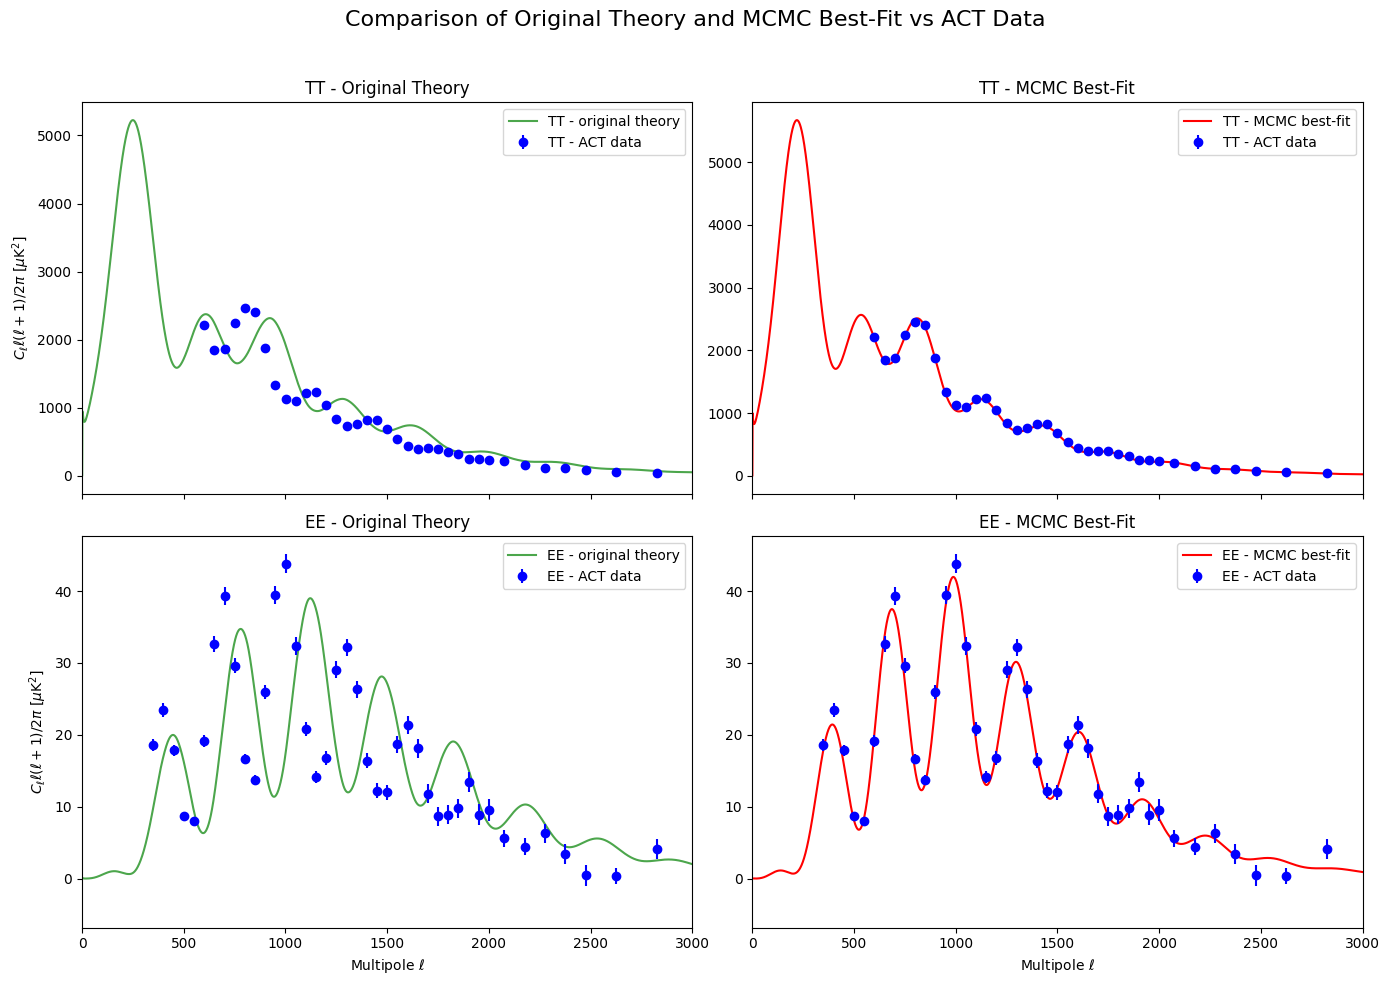

In [30]:
# --- Load chain ---
chain = np.loadtxt("chain.txt")
params = chain[:, :-1]  # all parameters
loglike = chain[:, -1]

# Use the mean of the chain as "best-fit" values
bestfit = np.mean(params, axis=0)  
H0, ombh2, omch2, omk, tau, ns = bestfit
print("Best-fit parameters:", bestfit)

# --- Set up CAMB with best-fit parameters ---
bestfit_params = camb.model.CAMBparams()
bestfit_params.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, omk=omk, tau=tau)
bestfit_params.InitPower.set_params(ns=ns, r=0)
bestfit_params.set_for_lmax(6000)

results_bestfit = camb.get_results(bestfit_params)
spectra_bestfit = results_bestfit.get_cmb_power_spectra(
    params=bestfit_params, spectra=('total',), CMB_unit='muK'
)['total']

ell = np.arange(spectra_bestfit.shape[0])
tt_bestfit, ee_bestfit, bb_bestfit, te_bestfit = spectra_bestfit.T

fig, axes = plt.subplots(2, 2, figsize=(14,10), sharex=True)

# --- TT plots ---
axes[0,0].plot(ell_new, dell_tt_new, "-", color='g', alpha=0.7, label="TT - original theory")
axes[0,0].errorbar(TT_bval, TT_dat, yerr=TT_err, fmt='bo', label="TT - ACT data")
axes[0,0].set_ylabel(r"$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]")
axes[0,0].legend()
axes[0,0].set_xlim(0,3000)
axes[0,0].set_title("TT - Original Theory")

axes[0,1].plot(ell, tt_bestfit, "-", color='r', alpha=1.0, label="TT - MCMC best-fit")
axes[0,1].errorbar(TT_bval, TT_dat, yerr=TT_err, fmt='bo', label="TT - ACT data")
axes[0,1].legend()
axes[0,1].set_xlim(0,3000)
axes[0,1].set_title("TT - MCMC Best-Fit")

# --- EE plots ---
axes[1,0].plot(ell_new, dell_ee_new, "-", color='g', alpha=0.7, label="EE - original theory")
axes[1,0].errorbar(EE_bval, EE_dat, yerr=EE_err, fmt='bo', label="EE - ACT data")
axes[1,0].set_ylabel(r"$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]")
axes[1,0].set_xlabel(r"Multipole $\ell$")
axes[1,0].legend()
axes[1,0].set_xlim(0,3000)
axes[1,0].set_title("EE - Original Theory")

axes[1,1].plot(ell, ee_bestfit, "-", color='r', alpha=1.0, label="EE - MCMC best-fit")
axes[1,1].errorbar(EE_bval, EE_dat, yerr=EE_err, fmt='bo', label="EE - ACT data")
axes[1,1].set_xlabel(r"Multipole $\ell$")
axes[1,1].legend()
axes[1,1].set_xlim(0,3000)
axes[1,1].set_title("EE - MCMC Best-Fit")

plt.suptitle("Comparison of Original Theory and MCMC Best-Fit vs ACT Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Part Five: Analyzing MCMC chains

We will use MCMC chains generated using the ACT likelihood to look at parameters. The Likelihood we've introduced above can be used to solve for the best fit cosmological parameters that fit the ACT data.  This process and our results are discussed more in [Choi et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_C20.pdf)  and  [Aiola et al (2020)](https://phyact1.princeton.edu/public/saiola/act_dr4_A20.pdf) but here we will show you how to use one of the MCMC chains to look at the parameters.
We begin by reading in a chain and a file with the corresponding column names.

In [62]:
# Begin by reading in a chain and names of the columns
import pandas as pd

# Read in the column names
names = pd.read_csv(path_to_act_notebook_data+"ACTPol_lcdm.paramnames.csv", names = ["parameter", "latex parameter name"])
chain = np.genfromtxt(path_to_act_notebook_data+"ACTPol_lcdm_1.txt")
names["parameter"]

0         omegabh2
1         omegach2
2            theta
3              tau
4             logA
5               ns
6               yp
7              H0*
8          omegal*
9          omegam*
10       omegamh2*
11      omeganuh2*
12       omegamh3*
13         sigma8*
14     s8omegamp5*
15    s8omegamp25*
16           s8h5*
17     rmsdeflect*
18           zrei*
19              A*
20          clamp*
21           DL40*
22          DL220*
23          DL810*
24         DL1420*
25         DL2000*
26           ns02*
27        yheused*
28          YpBBN*
29          DHBBN*
30            age*
31          zstar*
32          rstar*
33      thetastar*
34         DAstar*
35          zdrag*
36          rdrag*
37             kd*
38         thetad*
39            zeq*
40            keq*
41        thetaeq*
42      thetarseq*
43        rsDv057*
44      Hubble057*
45          DA057*
46         FAP057*
47    fsigma8z057*
48     sigma8z057*
49    chi2_ACTPol*
50     chi2_prior*
Name: parameter, dtype: object

### Making 1D parameter plots and 2D contour plots
Now that we've read in the chain we can look at the data more closely.  It's often useful to look at the 1D and 2D parameter plots, e.g. looking at just H0 or looking at H0 with Omega matter.

In this section we will demonstrate two ways that users can look at both of these plots.  The first is a straightforward example using matplotlib to make 1D and 2D plots for this chain.  The other option is to use [GetDist](https://getdist.readthedocs.io/en/latest/), a public software developed by Antony Lewis ([Lewis 2019](https://arxiv.org/abs/1910.13970)) specifically for rendering CMB MCMC chains.

We will start with the straightforward matplotlib example.  Here we will use H0 and $\Omega_m$ but you could use any of the parameters from the list above.

Text(0, 0.5, 'Probability Density')

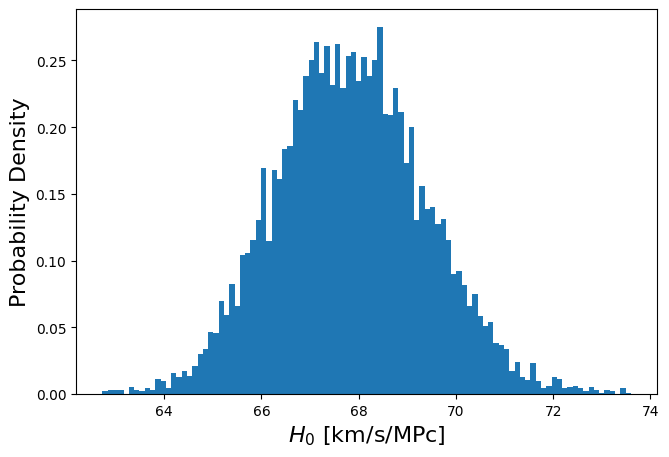

In [63]:
# We begin with the 1D plot of H0

# It's worth noting that since the first two columns of the chains are iteration and likelihood we add +2
# to the column number shown above when calling the columns in our scatter plot (i.e. we want H0 which is the 
# 7th parameter above so we plot chain[:, 9]) to get H0

# we use a histogram to look at the data here
plt.figure(figsize = (7.5,5))
plt.hist(chain[:,9], bins = 100, density = True)
plt.xlabel("$H_0$ [km/s/MPc]", fontsize = 16)
plt.ylabel("Probability Density", fontsize = 16)

It's easy to generalize to multi-dimensional projections of the likelihood, e.g. by examining the joint distribution of $H_0$ and $\Omega_m$ now:

Text(0.5, 0, '$H_0$ [km/s/MPc]')

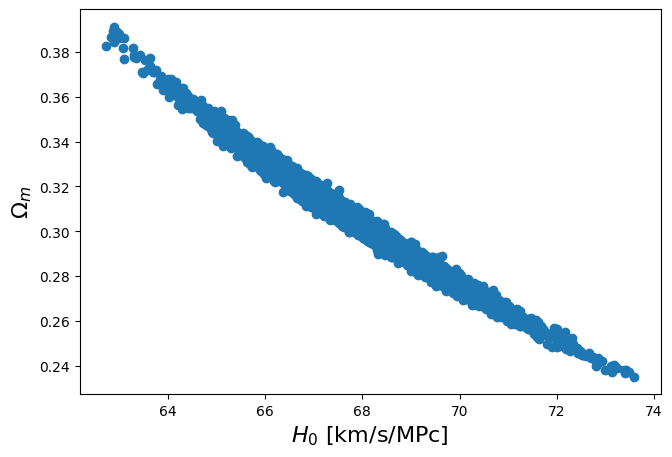

In [64]:
# Now let's try a 2D example adding in Omega Matter
plt.figure(figsize = (7.5, 5))
plt.scatter(chain[:,9], chain[:,11])
plt.ylabel("$\Omega_m$", fontsize = 16)
plt.xlabel("$H_0$ [km/s/MPc]", fontsize = 16)

Let's now make the same plots using getdist.  We need to start by reading in the files again using the getdist approach.  From there we will walk through how to make the 2 plots above.

./ACT data/ACTPol_lcdm_1.txt
Removed no burn in


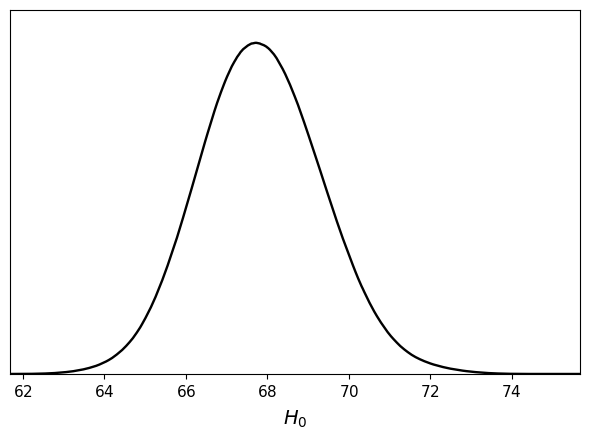

In [76]:
from getdist import loadMCSamples, plots

# Read in the samples
samples = loadMCSamples(path_to_act_notebook_data + 'ACTPol_lcdm', path_to_act_notebook_data + "ACTPol_lcdm_1.txt")

# Let's again start with the 1D version
g = plots.get_single_plotter()
g.plot_1d(samples, 'H0', marker_color='k')
plt.show()

As you can see the above plot is similar to our histogram but is much prettier!  We can also use getdist for 2D plots by using the `plot_2d` function from getdist.

((61.68027221163013, 75.67826446864929),
 (0.22068028430097583, 0.42084048532280444))

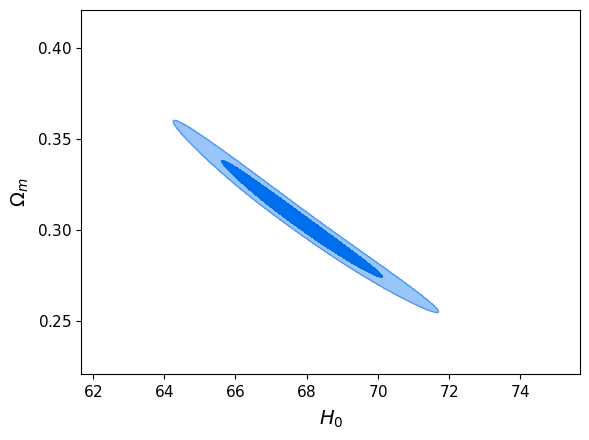

In [79]:
# We can now create a 2D contour plot using the samples we loaded above
g = plots.get_single_plotter()
g.plot_2d(samples, ['H0', 'omegam'], filled=True, )


<font color='red'>EXERCISE: </font>  Look at correlation between other parameters.

<font color='red'>EXERCISE: </font>  Compare these 1D and 2D with the equivalent for the chain you ran before.

Removed no burn in


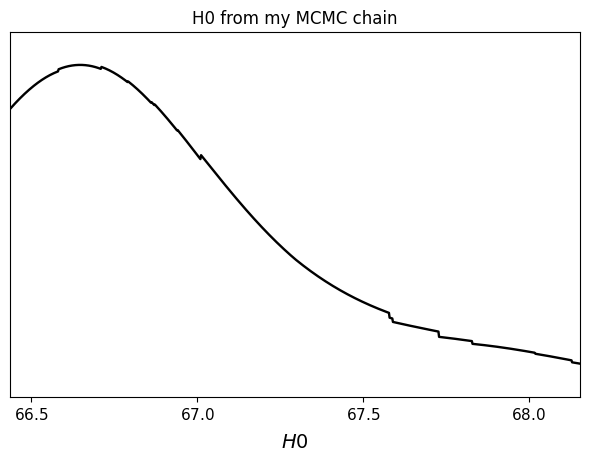

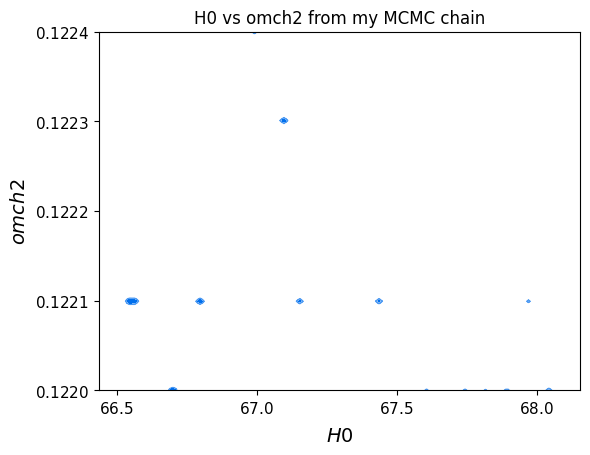

In [84]:
# --- Load your chain ---
chain = np.loadtxt("chain.txt")
params = chain[:, :-1]  # all parameter values
loglike = chain[:, -1]

# parameter names must match cosmology convention
param_names = ["H0", "ombh2", "omch2", "omk", "tau", "ns"]

# --- Wrap into GetDist MCSamples ---
my_samples = MCSamples(samples=params, names=param_names, labels=param_names)

# --- 1D plot for H0 ---
g = plots.get_single_plotter()
g.plot_1d(my_samples, 'H0', marker_color='r')
plt.title("H0 from my MCMC chain")
plt.show()

# --- 2D contour for H0 vs omch2 ---
g = plots.get_single_plotter()
g.plot_2d(my_samples, ['H0', 'omch2'], filled=True)
plt.title("H0 vs omch2 from my MCMC chain")
plt.show()


# Using emcee for MCMC

So far, we’ve explored parameter space by taking individual steps and evaluating the likelihood. To systematically sample the full posterior distribution, we now turn to Markov Chain Monte Carlo (MCMC) methods using the Python package emcee.

In [118]:
def log_probability(theta):
    H0, ombh2, omch2, omk, tau = theta
    
    # Tight priors around ACT results (e.g., from their 2014/2020 papers)
    if not (67 < H0 < 70 and 0.021 < ombh2 < 0.023 and 0.11 < omch2 < 0.13 and -0.05 < omk < 0.05 and 0.05 < tau < 0.07 and 0.95 < ns < 0.98):
        return -np.inf

    # Generate CAMB spectra for this parameter set
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, omk=omk, tau=tau)
    pars.InitPower.set_params(ns=ns, r=0)
    pars.set_for_lmax(6000)

    results = camb.get_results(pars)
    spectra = results.get_cmb_power_spectra(pars, spectra=('total',), CMB_unit='muK')['total']
    ell = np.arange(spectra.shape[0])
    tt_model, ee_model = spectra[:,0], spectra[:,1]

    # Compare to ACT data (chi^2 likelihood)
    chi2_tt = np.sum(((TT_dat - np.interp(TT_bval, ell, tt_model)) / TT_err)**2)
    chi2_ee = np.sum(((EE_dat - np.interp(EE_bval, ell, ee_model)) / EE_err)**2)

    return -0.5 * (chi2_tt + chi2_ee)

In [120]:
import emcee

ndim = 5  # number of parameters
nwalkers = 10  # number of walkers (should be ≥ 2*ndim for safety)
nsteps = 6  # tiny run just like our earlier test

# Starting positions: small scatter around your fiducial params
initial = np.array([67.5, 0.022, 0.122, 0, 0.06])
pos = initial +  np.random.randn(nwalkers, ndim)* np.array([0.02, 0.0005, 0.001, 0.01, 0.005])

# Initialize sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)

# Run short chain
sampler.run_mcmc(pos, nsteps, progress=True)

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:03<00:00, 50.66s/it]


State([[ 6.75048534e+01  2.21371762e-02  1.23165749e-01 -1.14171186e-02
   5.63212183e-02]
 [ 6.74706413e+01  2.18629677e-02  1.21029837e-01  4.52573760e-03
   6.09228318e-02]
 [ 6.74635586e+01  2.20861911e-02  1.21784939e-01  1.00693055e-03
   6.41669675e-02]
 [ 6.75071079e+01  2.17176677e-02  1.21768518e-01  2.80910168e-03
   5.45905299e-02]
 [ 6.75536980e+01  2.23329520e-02  1.20708008e-01 -4.62625599e-03
   6.73256603e-02]
 [ 6.74892091e+01  2.14269202e-02  1.21086115e-01  1.09255311e-02
   6.23820989e-02]
 [ 6.74849894e+01  2.18443253e-02  1.22453583e-01 -5.60641489e-03
   6.08341587e-02]
 [ 6.74769694e+01  2.19476302e-02  1.22365913e-01  8.23492729e-04
   6.34494356e-02]
 [ 6.75001452e+01  2.20959973e-02  1.23083512e-01  8.19424823e-03
   6.29925528e-02]
 [ 6.75572867e+01  2.13471199e-02  1.21833172e-01  1.02012220e-02
   5.21677301e-02]], log_prob=[-695.36218976 -228.77245707 -316.59699258 -203.72814928 -463.58147954
 -236.80209709 -500.82567739 -331.55731181 -246.70554145 -161.

In [121]:
samples = sampler.get_chain(flat=True)
print(samples.shape)  # should be (nwalkers*nsteps, ndim)

# Save for later
np.savetxt("chain_emcee.txt", samples)

(60, 5)


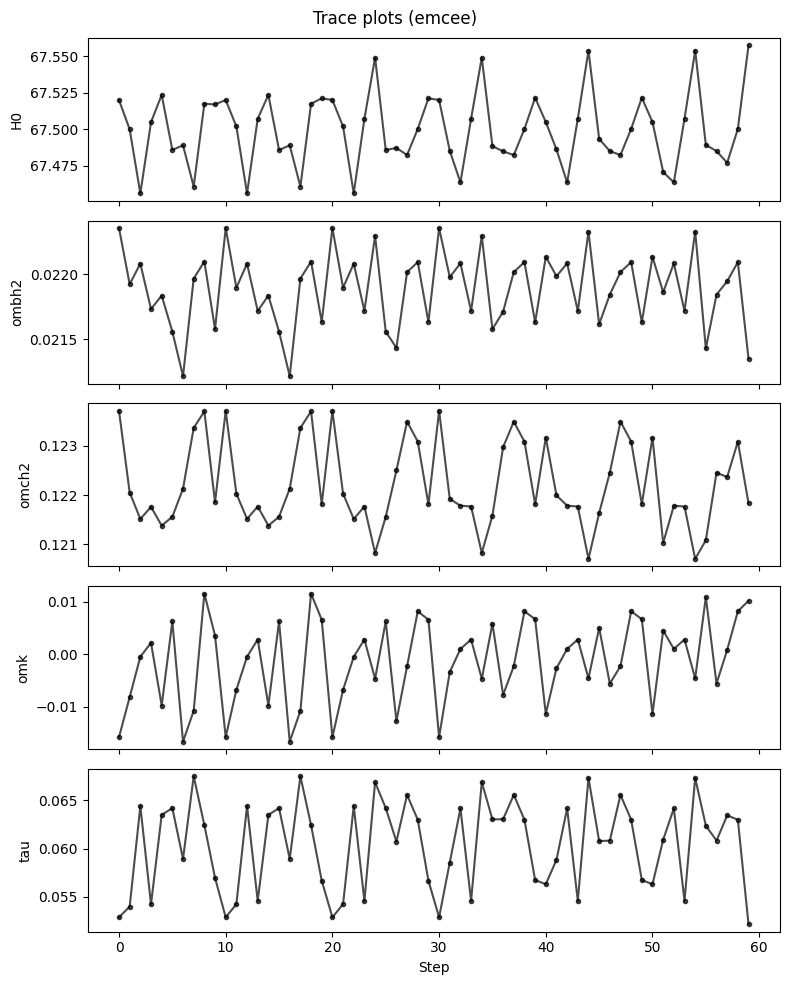

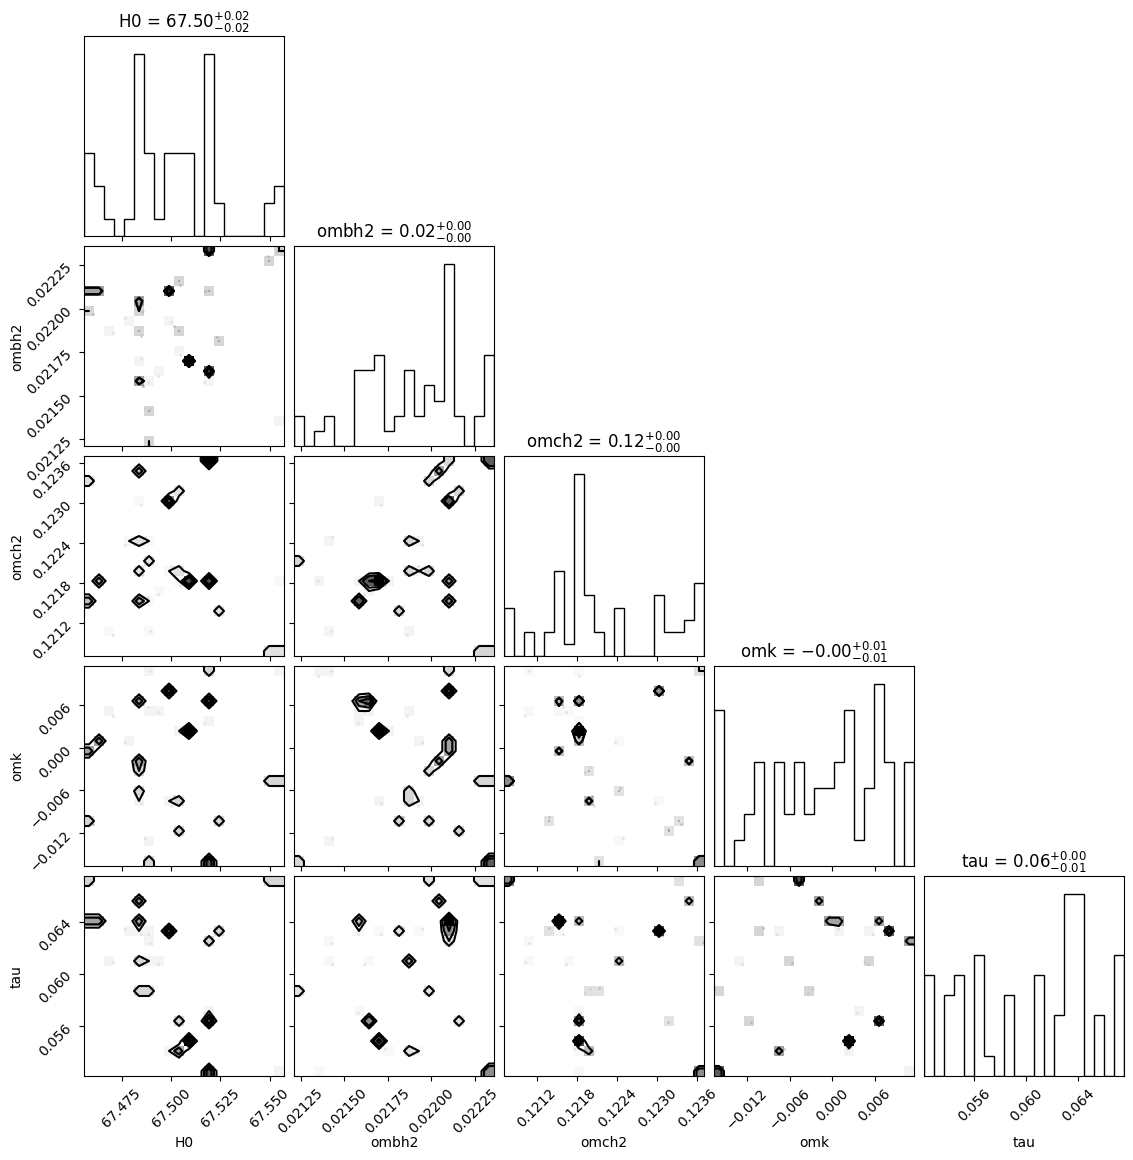

In [122]:
# --- Load chain from file ---
chain_emcee = np.loadtxt("chain_emcee.txt")

# If you saved with shape (nsteps, ndim) → good.
# If it was flattened walkers, reshape here (example: 4 walkers, 10 steps):
# chain_emcee = chain_emcee.reshape((4, 10, ndim))

param_names = ["H0", "ombh2", "omch2", "omk", "tau"]

# --- 1. Trace plots ---
fig, axes = plt.subplots(len(param_names), 1, figsize=(8, 10), sharex=True)
for i, name in enumerate(param_names):
    axes[i].plot(chain_emcee[:, i], "k.-", alpha=0.7)
    axes[i].set_ylabel(name)
axes[-1].set_xlabel("Step")
plt.suptitle("Trace plots (emcee)")
plt.tight_layout()
plt.show()

# --- 2. Corner plot ---
fig = corner.corner(chain_emcee, labels=param_names, show_titles=True)
plt.show()

Best-fit from emcee: [ 6.74995621e+01  2.18924961e-02  1.22206775e-01 -1.43185539e-03
  6.03923838e-02]


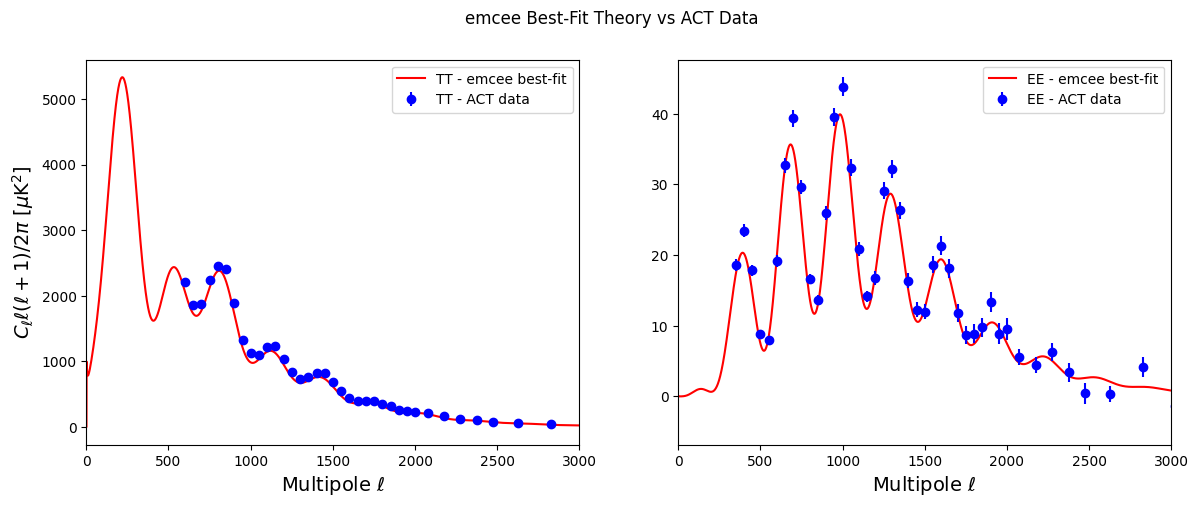

In [31]:
# --- Load emcee chain ---
chain_emcee = np.loadtxt("chain_emcee.txt")
param_names = ["H0", "ombh2", "omch2", "omk", "tau"]

# --- Best-fit (mean of chain) ---
bestfit_emcee = np.mean(chain_emcee, axis=0)
H0, ombh2, omch2, omk, tau = bestfit_emcee
print("Best-fit from emcee:", bestfit_emcee)

# --- Generate CAMB spectra for best-fit ---
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, omk=omk, tau=tau)
pars.set_for_lmax(6000)

res = camb.get_results(pars)
spectra = res.get_cmb_power_spectra(pars, spectra=('total',), CMB_unit='muK')['total']

ell = np.arange(spectra.shape[0])
tt_emcee, ee_emcee, bb_emcee, te_emcee = spectra.T

# --- Plot TT and EE with ACT data ---
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(ell, tt_emcee, "-", color='r', label="TT - emcee best-fit")
plt.errorbar(TT_bval, TT_dat, yerr=TT_err, fmt='bo', label="TT - ACT data")
plt.ylabel(r"$C_\ell \ell (\ell+1)/2\pi$ [$\mu$K$^2$]", fontsize=14)
plt.xlabel(r"Multipole $\ell$", fontsize=14)
plt.legend()
plt.xlim(0,3000)

plt.subplot(1,2,2)
plt.plot(ell, ee_emcee, "-", color='r', label="EE - emcee best-fit")
plt.errorbar(EE_bval, EE_dat, yerr=EE_err, fmt='bo', label="EE - ACT data")
plt.xlabel(r"Multipole $\ell$", fontsize=14)
plt.legend()
plt.xlim(0,3000)

plt.suptitle("emcee Best-Fit Theory vs ACT Data")
plt.show()